In [205]:
import numpy as np
from scipy.special import binom
from scipy.special import comb
from scipy.special import factorial
from scipy import stats as sps
from decimal import Decimal
from matplotlib import pyplot as plt
from tqdm import tqdm_notebook as tqdm
from scipy.special import lambertw
%config InlineBackend.figure_format='retina'


## Limit distribution EX(n+1)

In [2]:
def calc_expected(n, d, k_start, k_end):
    res = Decimal(0)
    max_value = (0, 0)
    for k in range(k_start, k_end + 1):
        value = Decimal(0)
        for m in tqdm(range(k, n + 1)):
            value += Decimal(comb(n, m, exact=True)) * \
                   Decimal(comb(n, n + k - m, exact=True)) * Decimal(1 - d/n) ** (m * (n + k - m))
        if value > max_value[0]:
                max_value = (value, k)
        res += value
    return res, max_value[1]

In [ ]:
##### %%time
n = 10000
d = 100
k = int(np.log(d) / d * n)
print(calc_expected(n, d, 1, 1))
print(calc_expected(n, d, 2, 2))
print(calc_expected(n, d, 3, 3))

In [117]:
%%time
n = 1000
d = 20
k = int(np.log(d) / d * n)
print(calc_expected(n, d, 1, 1))
print(calc_expected(n, d, 2, 2))
print(calc_expected(n, d, 3, 3))

(Decimal('0.000003368881824775794363682170666'), 1)
(Decimal('2.831230289651319804452868110E-12'), 2)
(Decimal('1.584890840500043457440526697E-18'), 3)
CPU times: user 504 ms, sys: 4.08 ms, total: 508 ms
Wall time: 514 ms


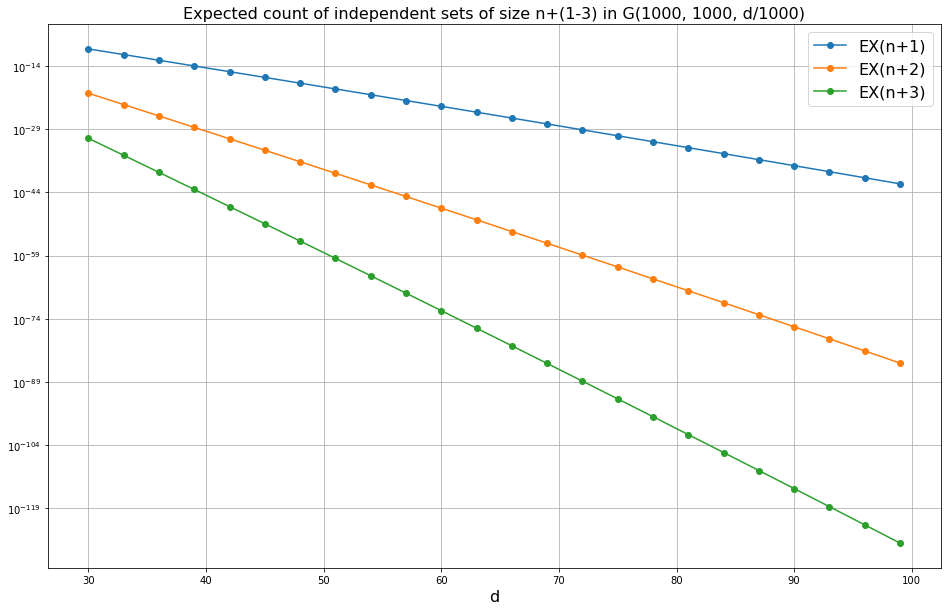

In [150]:
plt.figure(figsize=(16, 10))
plt.plot(range(30, 100, 3), 
         [calc_expected(n, d, 1, 1)[0] for d in range(30, 100, 3)], '-o', label='EX(n+1)')
plt.plot(range(30, 100, 3), 
         [calc_expected(n, d, 2, 2)[0] for d in range(30, 100, 3)], '-o', label='EX(n+2)')
plt.plot(range(30, 100, 3), 
         [calc_expected(n, d, 3, 3)[0] for d in range(30, 100, 3)], '-o', label='EX(n+3)')
plt.yscale('log')
plt.grid()
plt.legend(prop={'size': 16})
plt.xlabel('d', fontsize=16)
plt.title('Expected count of independent sets of size n+(1-3) in G(1000, 1000, d/1000)', fontsize=16)
plt.show()

In [145]:
%%time
n_range = [500, 1000, 3000, 5000, 10000, 15000]
vals_30 = [calc_expected(n, 30, 1, 1)[0] for n in n_range]

/var/folders/nm/ww3g6qt17nn323rj_h993tf00000gn/T/ipykernel_38977/3032429968.py:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for m in tqdm(range(k, n + 1)):


  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/15000 [00:00<?, ?it/s]

CPU times: user 10min 20s, sys: 4.01 s, total: 10min 24s
Wall time: 10min 25s


In [158]:
%%time
n_range = [500, 1000, 3000, 5000, 10000, 15000]
vals_50 = [calc_expected(n, 50, 1, 1)[0] for n in n_range]

/var/folders/nm/ww3g6qt17nn323rj_h993tf00000gn/T/ipykernel_38977/3032429968.py:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for m in tqdm(range(k, n + 1)):


  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/15000 [00:00<?, ?it/s]

CPU times: user 10min 20s, sys: 3.93 s, total: 10min 23s
Wall time: 10min 24s


In [165]:
%%time
n_range = [500, 1000, 3000, 5000, 10000, 15000]
vals_20 = [calc_expected(n, 20, 1, 1)[0] for n in n_range]

/var/folders/nm/ww3g6qt17nn323rj_h993tf00000gn/T/ipykernel_38977/3032429968.py:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for m in tqdm(range(k, n + 1)):


  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/15000 [00:00<?, ?it/s]

CPU times: user 10min 20s, sys: 3.83 s, total: 10min 24s
Wall time: 10min 24s


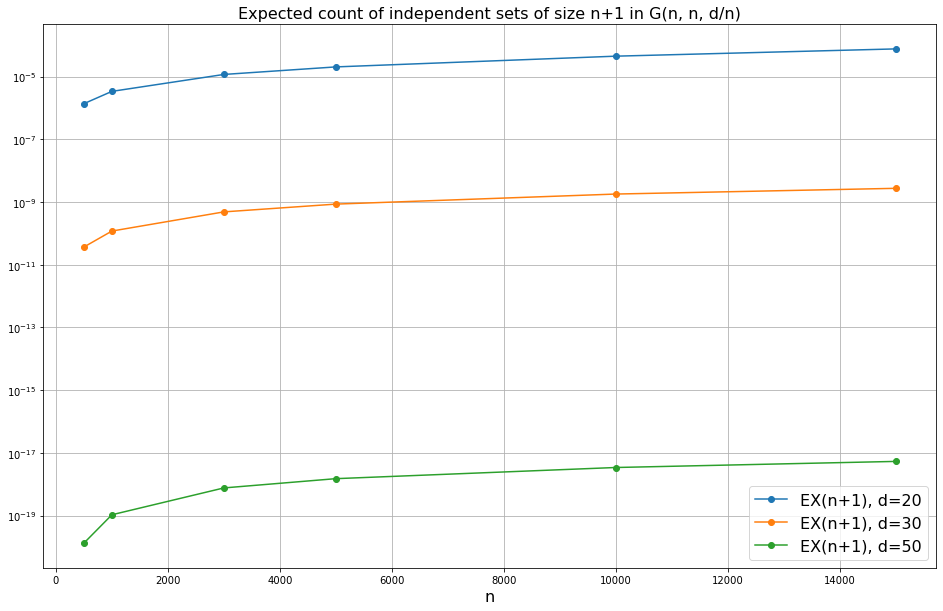

In [166]:
plt.figure(figsize=(16, 10))
plt.plot(n_range, vals_20, '-o', label='EX(n+1), d=20')
plt.plot(n_range, vals_30, '-o', label='EX(n+1), d=30')
plt.plot(n_range, vals_50, '-o', label='EX(n+1), d=50')
plt.yscale('log')
plt.grid()
plt.legend(prop={'size': 16})
plt.xlabel('n', fontsize=16)
plt.title('Expected count of independent sets of size n+1 in G(n, n, d/n)', fontsize=16)
plt.show()

/var/folders/nm/ww3g6qt17nn323rj_h993tf00000gn/T/ipykernel_38977/3032429968.py:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for m in tqdm(range(k, n + 1)):


  0%|          | 0/99 [00:00<?, ?it/s]

  0%|          | 0/999 [00:00<?, ?it/s]

  0%|          | 0/1999 [00:00<?, ?it/s]

  0%|          | 0/2999 [00:00<?, ?it/s]

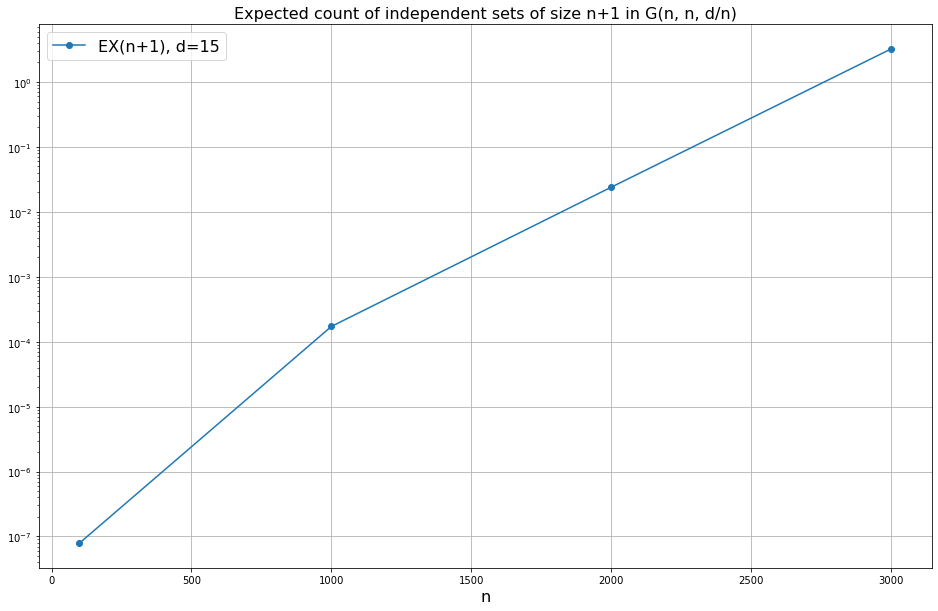

In [176]:
n_range = [100, 1000, 2000, 3000]
vals_20 = [calc_expected(n, 12, 2, 2)[0] for n in n_range]
plt.figure(figsize=(16, 10))
plt.plot(n_range, vals_20, '-o', label='EX(n+1), d=15')
plt.yscale('log')
plt.grid()
plt.legend(prop={'size': 16})
plt.xlabel('n', fontsize=16)
plt.title('Expected count of independent sets of size n+1 in G(n, n, d/n)', fontsize=16)
plt.show()

## Distribution of componets of EX(n+1)

In [262]:
def get_components(n, d, k, m_range = None):
    if m_range is None:
        m_range = range(k, n + 1)
    res = []
    prev = 0
    for m in m_range:
        value = Decimal(comb(n, m, exact=True)) * \
               Decimal(comb(n, n + k - m, exact=True)) * Decimal(1 - d/n) ** (m * (n + k - m))
        #if prev > value:
        #    break
        prev = value
        res.append(value)
    return np.array(res)

In [62]:
n = 1250000
d = 15
k = int(n * np.e ** (-d / 2))

In [63]:
components = get_components(n, d, k, [k, k + 1])
print(k)
print(n * np.e ** (-d / 2))
print(components[1] / components[0])

691
691.3554626847923
696.0234547906384319432090891


## Graphics of F, F_1, F_2, F_3

In [272]:
n = 100
d = 5
k = 3

20336.60715995609660560973647 0.03355765513340946532260094711


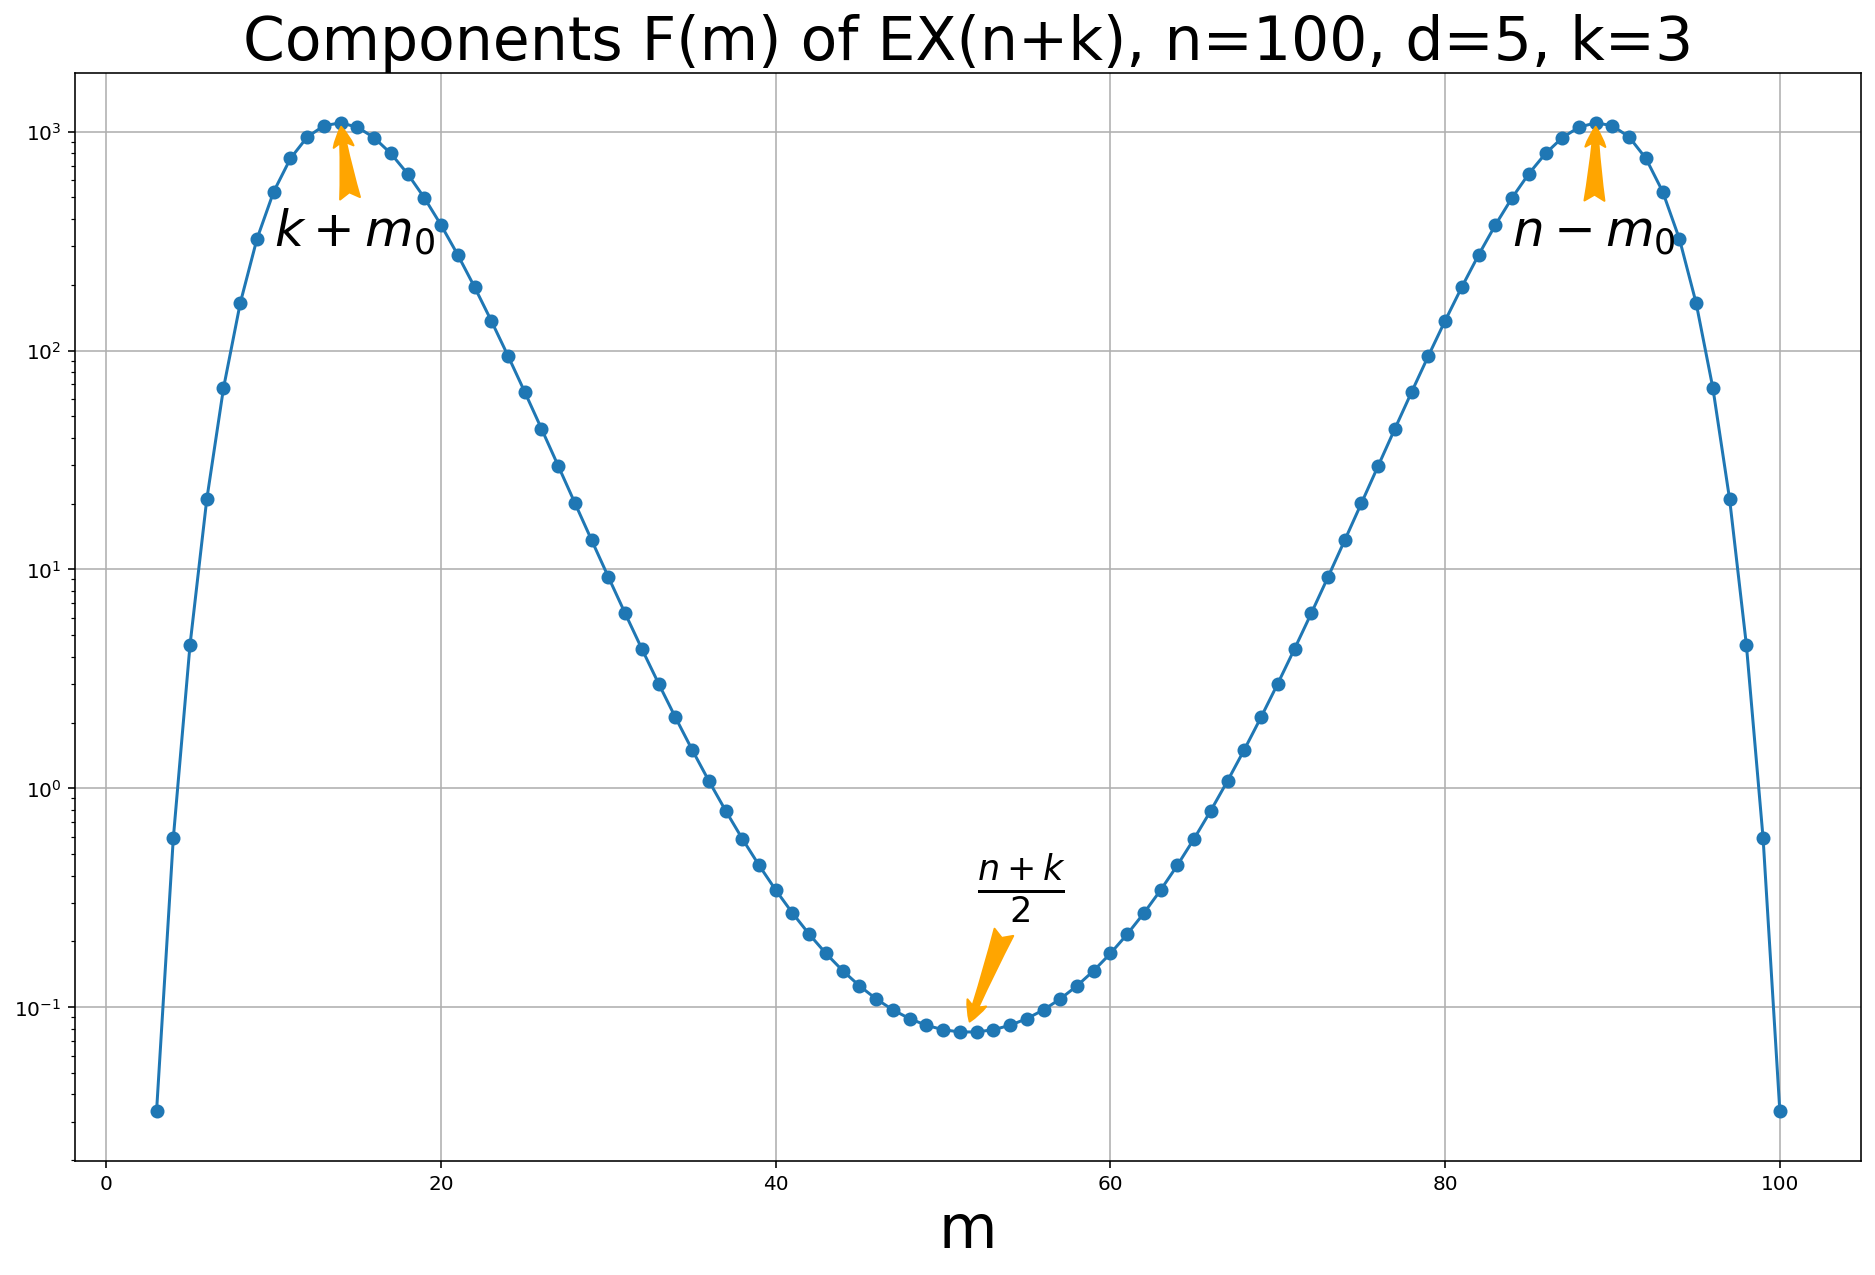

In [290]:
components = get_components(n, d, k)

print(sum(components), components[0])
plt.figure(figsize=(16, 10))
plt.plot(range(k, k + len(components)), components, '-o')
plt.annotate(r"$k + m_0$", xy=(np.argmax(components) + k, max(components)), xytext=(10, 300),
            arrowprops=dict(arrowstyle="fancy", color='orange'), size=25)
plt.annotate(r"$n - m_0$", xy=(89, max(components)), xytext=(84, 300),
            arrowprops=dict(arrowstyle="fancy", color='orange'), size=25)
plt.annotate(r"$\frac{n+k}{2}$", xy=((n+k)/2, components[(n+k)//2]), xytext=(52, 0.3),
            arrowprops=dict(arrowstyle="fancy", color='orange'), size=25)
plt.yscale('log')
plt.grid()
plt.xlabel('m', fontsize=30)
plt.title('Components F(m) of EX(n+k), n=100, d=5, k=3', fontsize=30)
plt.savefig('F_m.eps')
plt.show()

20336.60715995609660560973647 0.03355765513340946532260094711


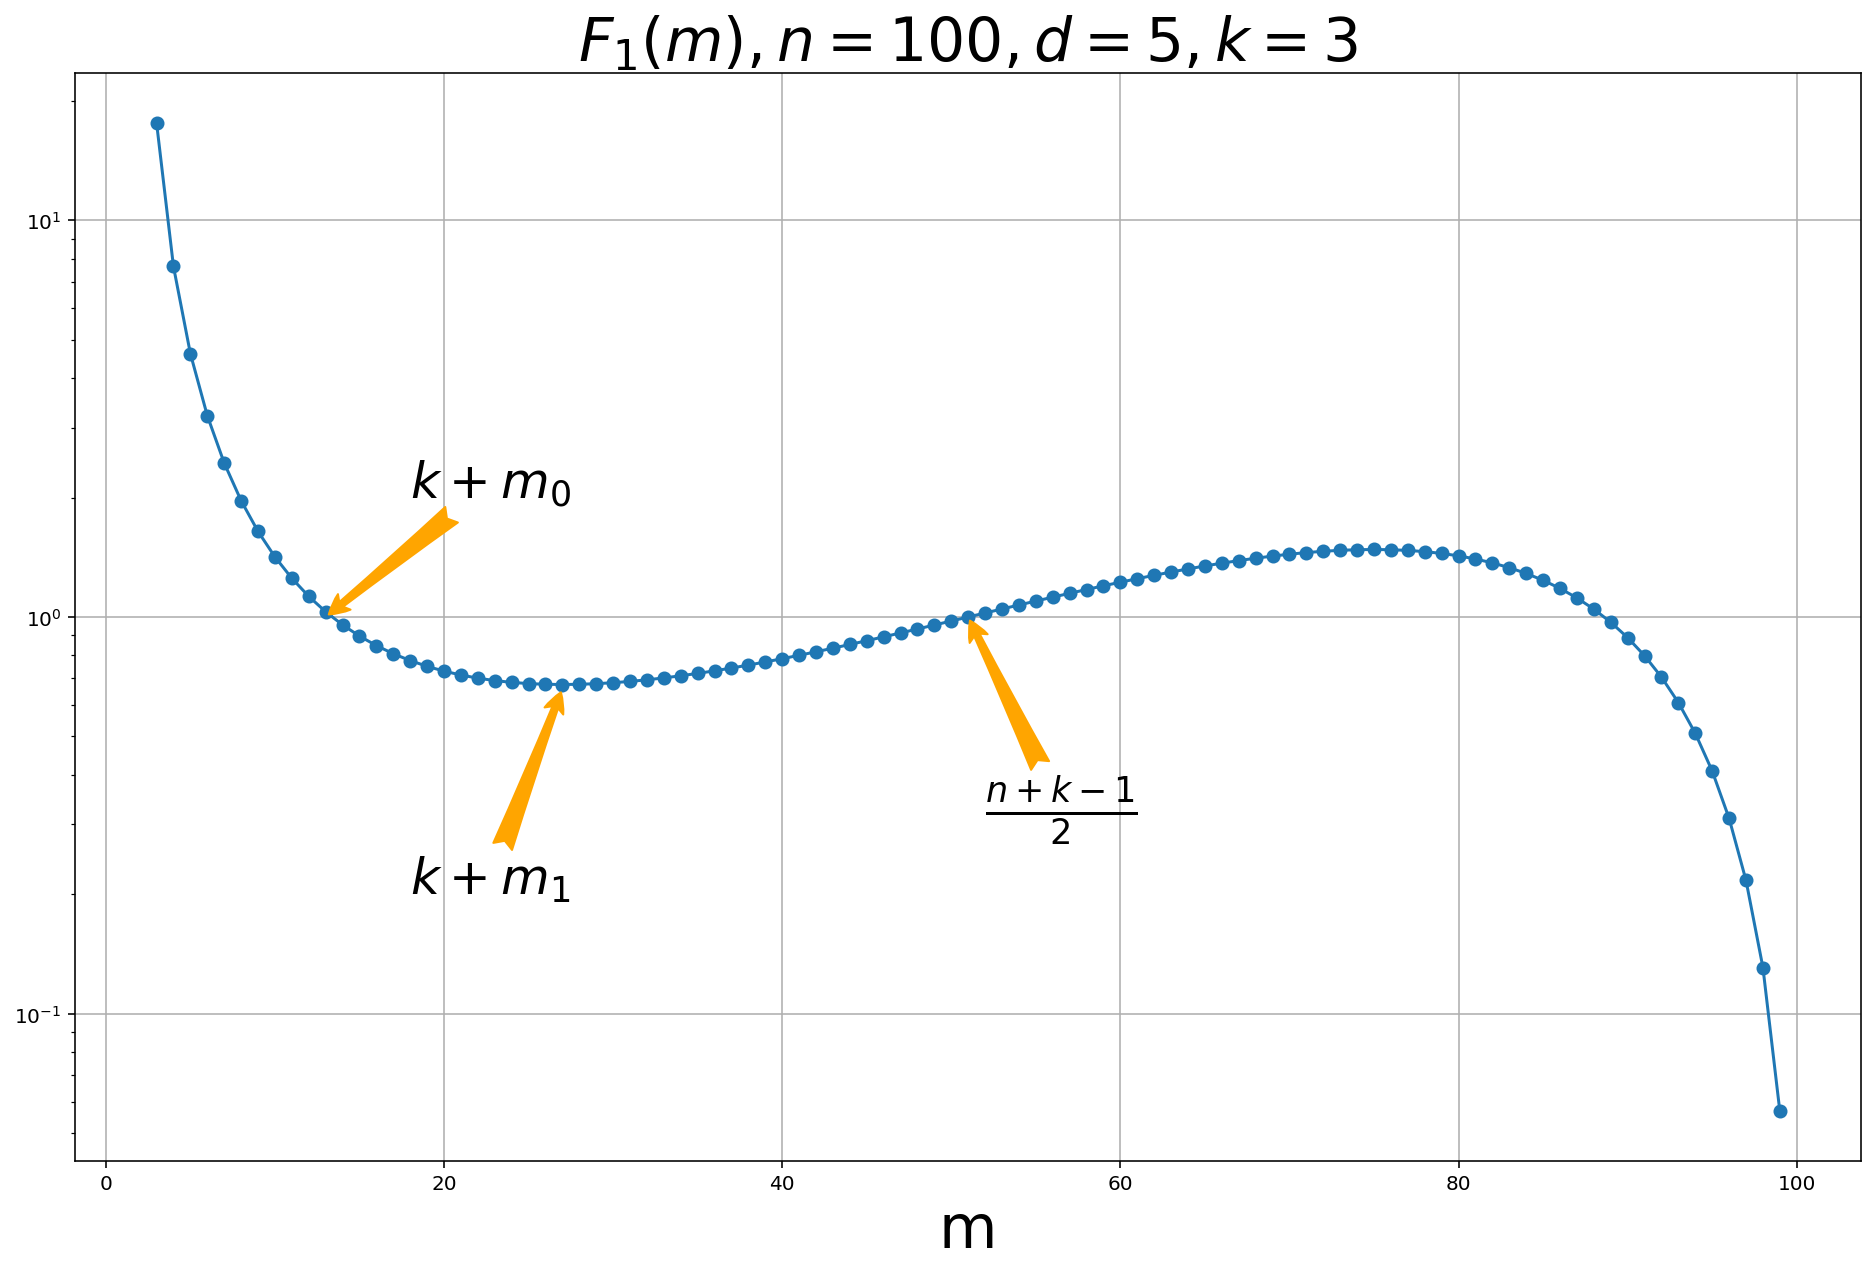

In [286]:
components = get_components(n, d, k)

print(sum(components), components[0])
plt.figure(figsize=(16, 10))
c = components[1:] / components[:-1]
plt.plot(range(k, k + len(components) - 1), c, '-o')
plt.yscale('log')
plt.grid()
plt.xlabel('m', fontsize=30)
plt.annotate(r"$k + m_0$", xy=(13, 1), xytext=(18, 2),
            arrowprops=dict(arrowstyle="fancy", color='orange'), size=25)
plt.annotate(r"$k + m_1$", xy=(27, 0.66), xytext=(18, 0.2),
            arrowprops=dict(arrowstyle="fancy", color='orange'), size=25)
plt.annotate(r"$\frac{n+k-1}{2}$", xy=((n+k-1)/2, 1), xytext=(52, 0.3),
            arrowprops=dict(arrowstyle="fancy", color='orange'), size=25)
plt.title(r'$F_1(m), n=100, d=5, k=3$', fontsize=30)
plt.savefig('F_1_m.eps')
plt.show()

20336.60715995609660560973647 0.03355765513340946532260094711


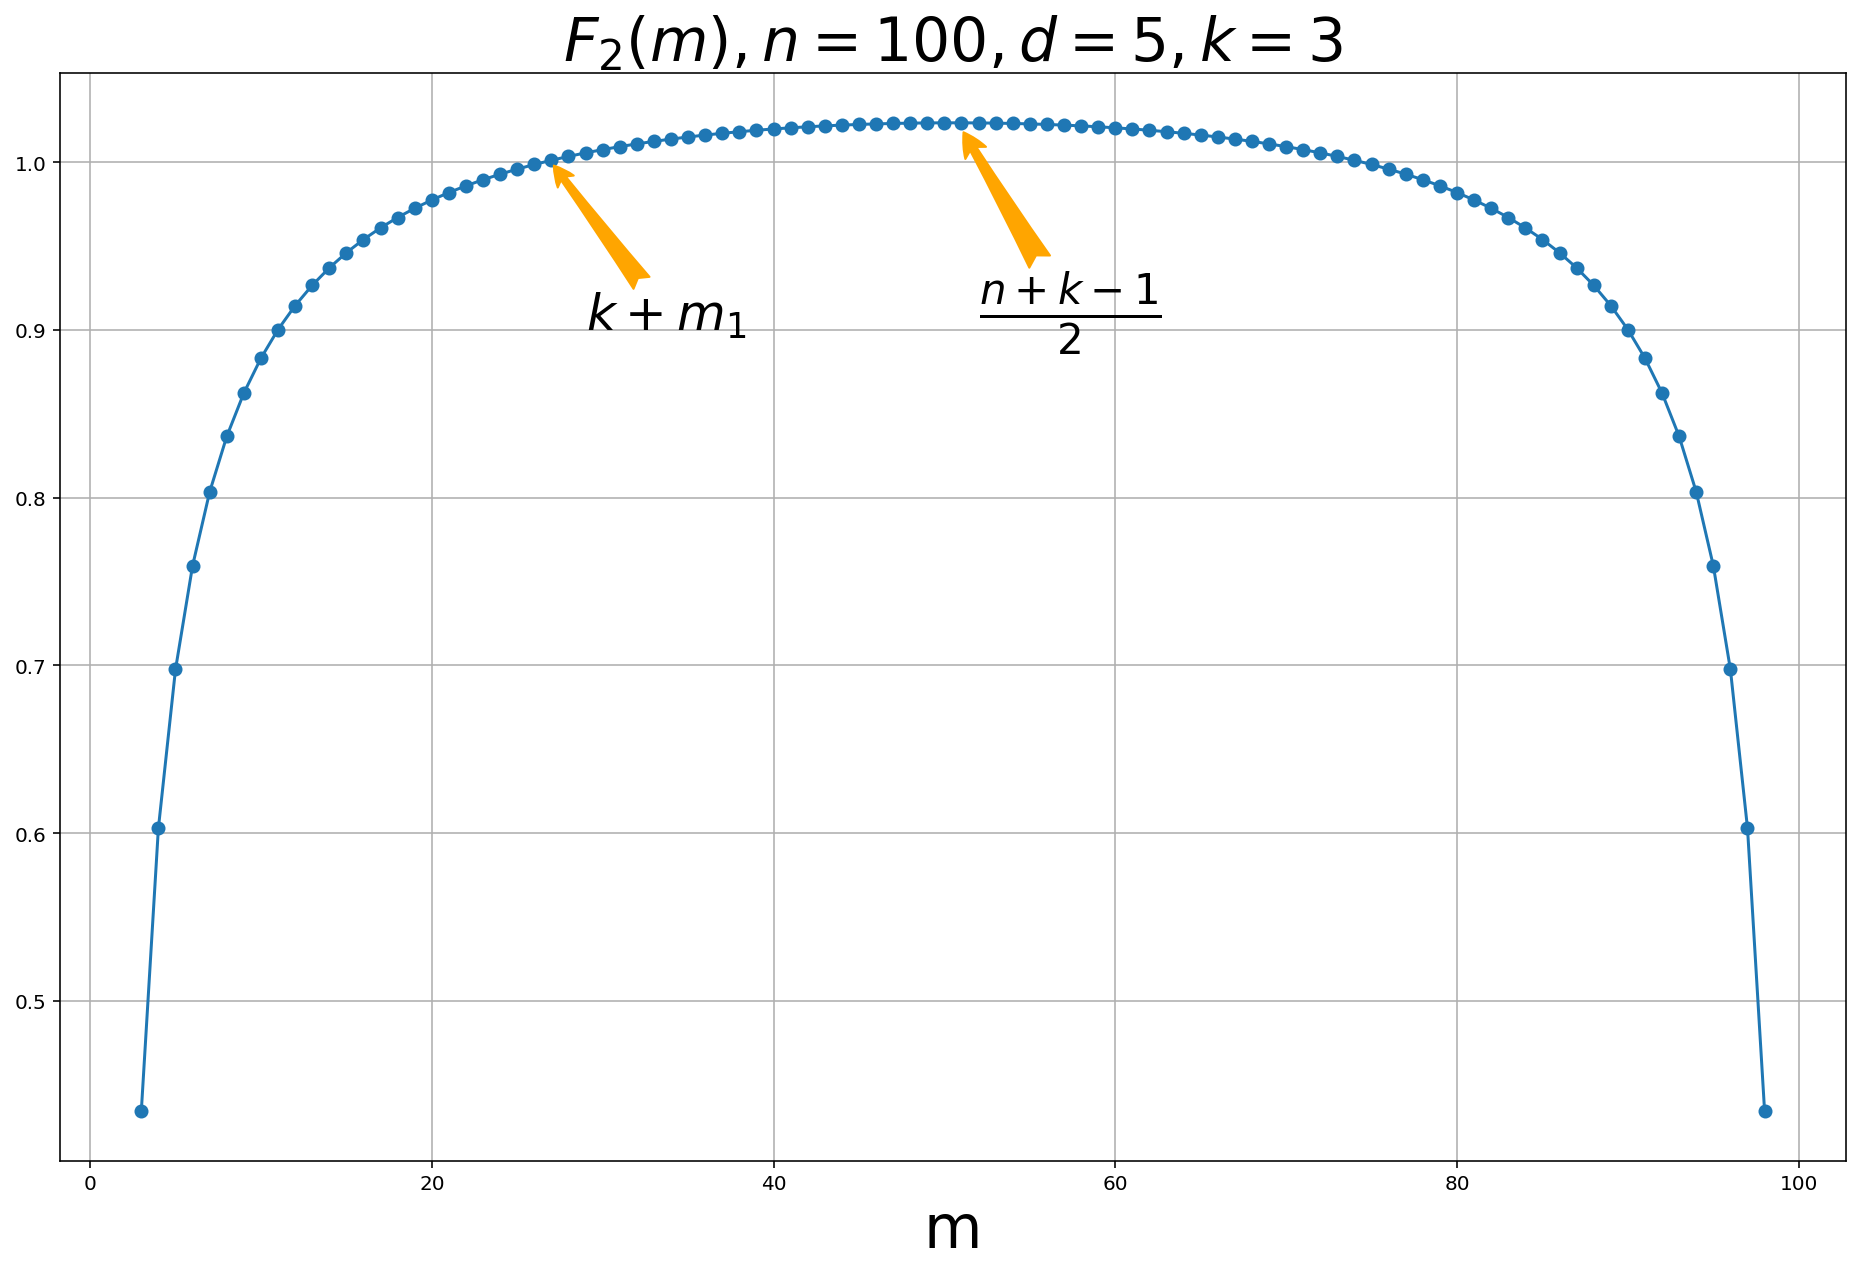

In [287]:
components = get_components(n, d, k)

print(sum(components), components[0])
plt.figure(figsize=(16, 10))
c = components[1:] / components[:-1]
c2 = c[1:] / c[:-1]
plt.plot(range(k, k + len(components) - 2), c2, '-o')
#plt.yscale('log')
plt.grid()
plt.xlabel('m', fontsize=30)
plt.annotate(r"$\frac{n+k-1}{2}$", xy=((n+k-1)/2, 1.02), xytext=(52, 0.9),
            arrowprops=dict(arrowstyle="fancy", color='orange'), size=30)
plt.annotate(r"$k + m_1$", xy=(27, 1), xytext=(29, 0.9),
            arrowprops=dict(arrowstyle="fancy", color='orange'), size=25)
plt.title(r'$F_2(m), n=100, d=5, k=3$', fontsize=30)
plt.savefig('F_2_m.eps')
plt.show()

20336.60715995609660560973647 0.03355765513340946532260094711


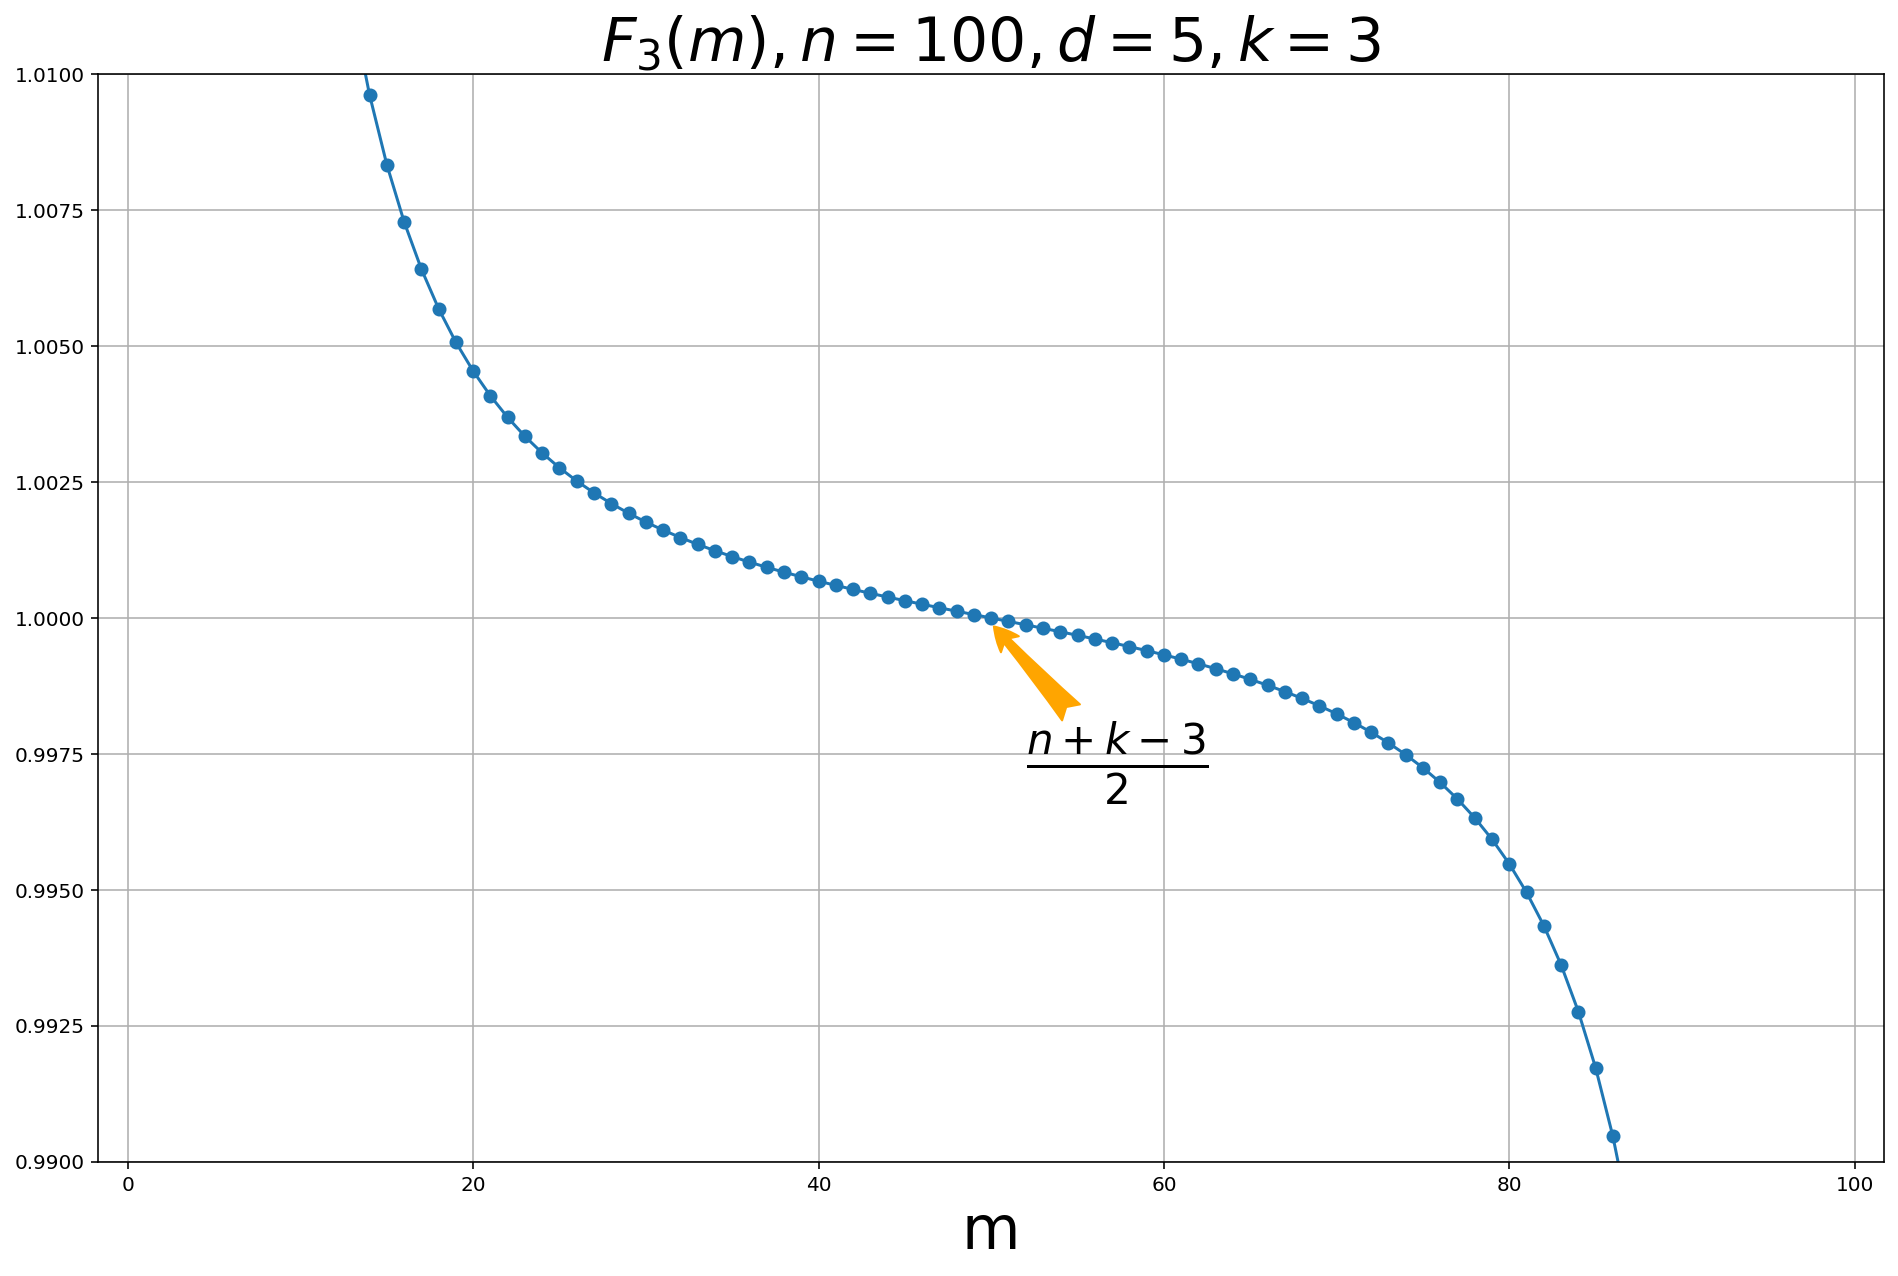

In [288]:
components = get_components(n, d, k)

print(sum(components), components[0])
plt.figure(figsize=(16, 10))
c = components[1:] / components[:-1]
c2 = c[1:] / c[:-1]
c3 = c2[1:] / c2[:-1]
plt.plot(range(k, k + len(components) - 3), c3, '-o')
plt.ylim((0.99, 1.01))
plt.grid()
plt.xlabel('m', fontsize=30)
plt.annotate(r"$\frac{n+k-3}{2}$", xy=((n+k-3)/2, 0.9999), xytext=(52, 0.997),
            arrowprops=dict(arrowstyle="fancy", color='orange'), size=30)
plt.title(r'$F_3(m), n=100, d=5, k=3$', fontsize=30)
plt.savefig('F_3_m.eps')
plt.show()

5.015783255048409316813162844E+138 0.07211723870795165592112613818


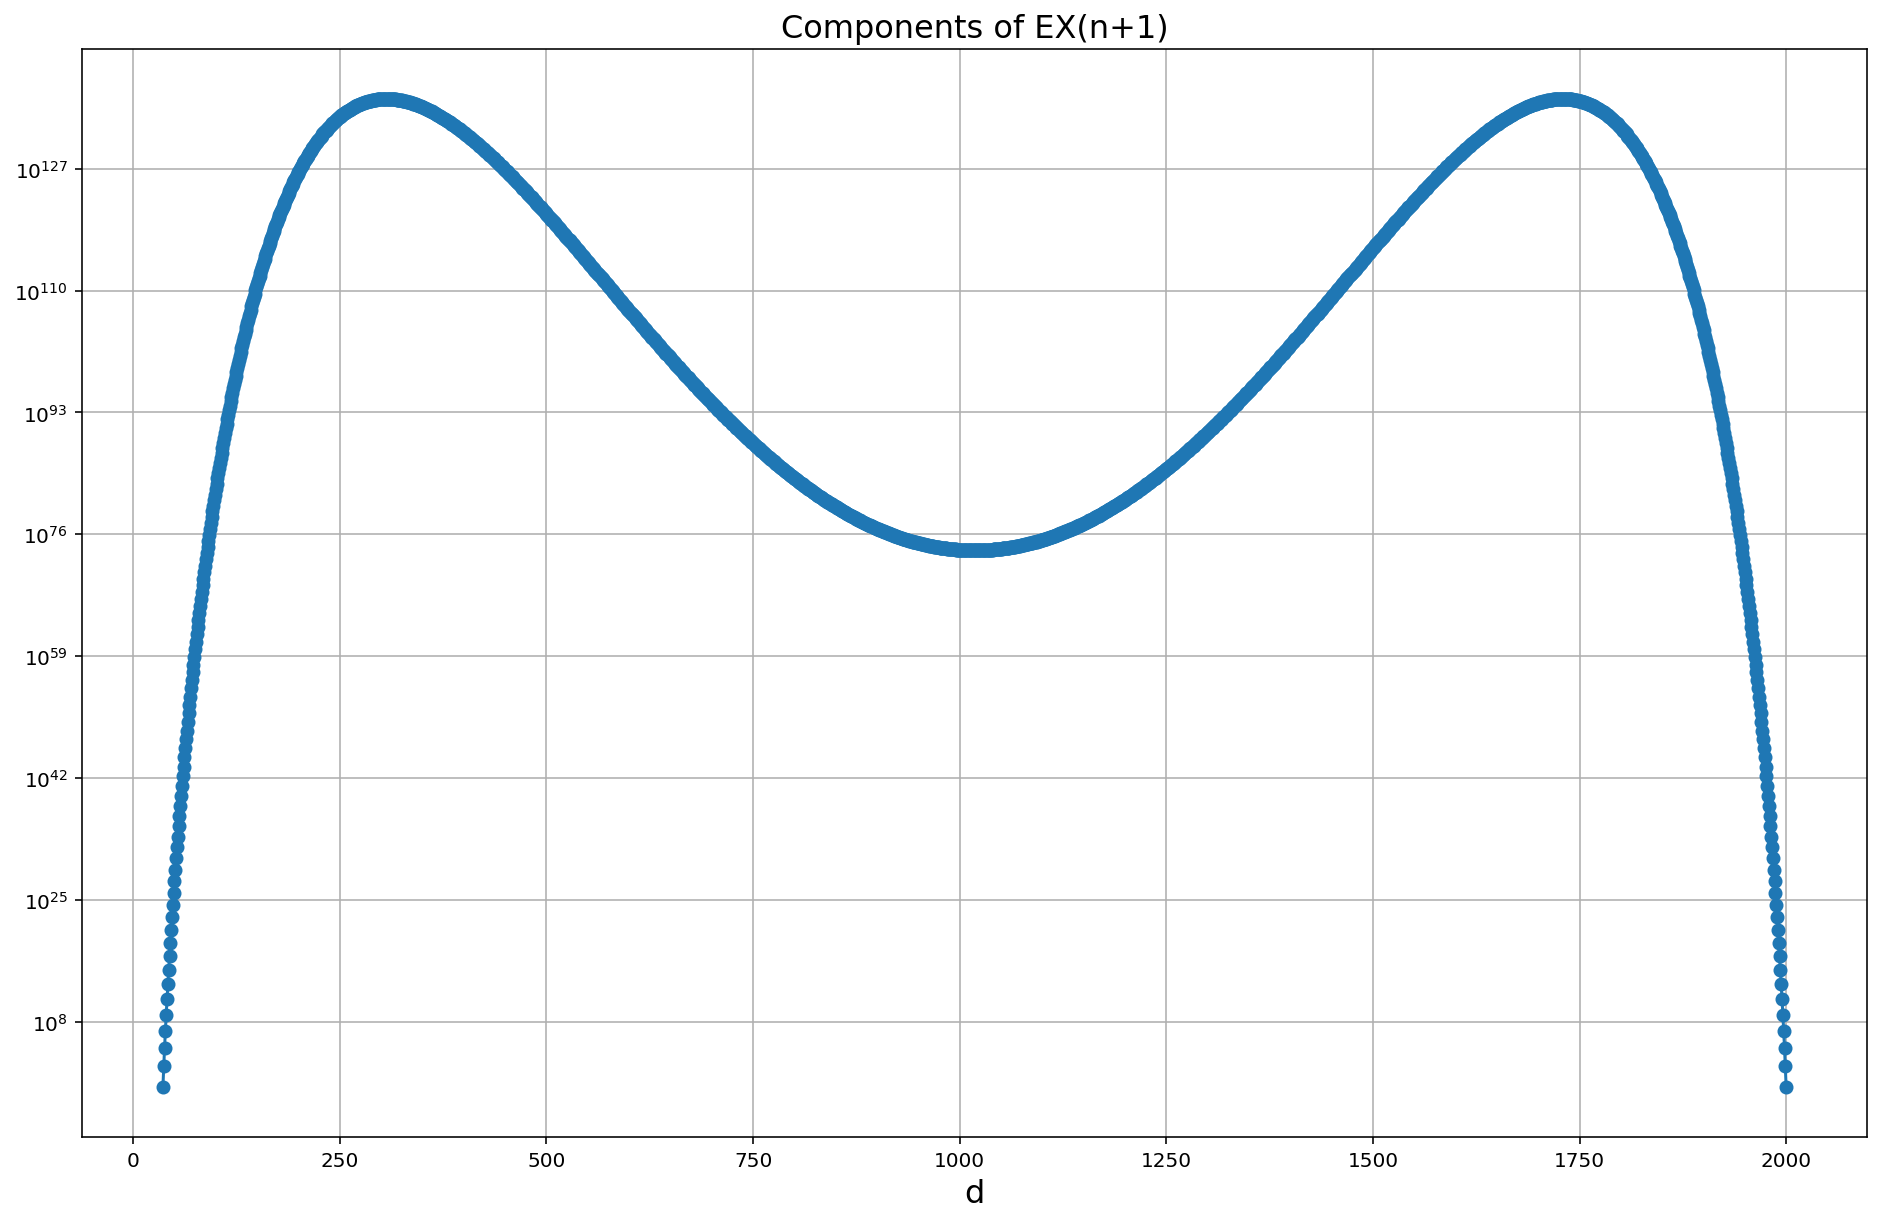

In [283]:
n = 2000
d = 5
k = 36

plt.figure(figsize=(16, 10))
components = get_components(n, d, k)
print(sum(components), components[0])
plt.plot(range(k, k + len(components)), components, '-o')
plt.yscale('log')
plt.grid()
plt.xlabel('d', fontsize=16)
plt.title('Components of EX(n+1)', fontsize=16)
plt.show()

In [634]:
# n=1000 d=10 -> [2, 3]
# n=1000 d=7 -> [18, 19]
# n=1000 d=6 -> [36, 37]
# n=1000 d=5 -> [75, 76]
# n=1000 d=4 -> [165, 166]
# n=2000 d=3 -> [621, 622]
# n=2000 d=11 -> [3, 4]
# n=2000 d=4 -> [331, 332]
# n=2000 d=8 -> [19, 20]
# n=2000 d=9 -> [10, 11]
# n=2000 d=10 -> [5, 6]
# n=5000 d=10 -> [13, 14]
# n=5000 d=8 -> [47, 48]
# n=20000 d=9 -> [100, 101]
# n=20000 d=8 -> [190, 191]
# n=100000 d=10 -> [272, 273]
# n=100000 d=11 -> [149, 150]
# n=100000 d=12 -> [82, 83]
# n=100000 d=13 -> [46, 47]
# n=100000 d=9 -> [504, 505]
2000 / 2**4 * np.log(4) ** 2

240.2265069591007

In [893]:
2000 / 622 # d=3 -> 3.21 - 3.22
2000 / 332 # d=4 -> 6.02 - 6.04
1000 / 76 # d=5 -> 13.15 - 13.3
1000 / 36 # d=6 -> 27.02 - 27.7
1000 / 19 # d=7 -> 52.63 - 55.5
5000 / 13 # d=8 -> 104 - 106
20000 / 101 # d=9 -> 198 - 200
20000 / 191 # d=8 -> 104.7 - 105
100000 / 505 # d=9 -> 198 - 198.4
100000 / 272 # d=10 -> 366 - 368
100000 / 150 # d=11 -> 666 - 671
100000 / 83 # d=12 -> 1204 - 1220
100000 / 46 # d=13 -> 2127 - 2173

2173.913043478261

In [3]:
3.21 / np.e ** (3 / 2 - 1)

1.9469634176775532

In [4]:
6.02 / np.e ** (4 / 2 - 1)

2.2146342358520825

In [5]:
13.15 / np.e ** (5 / 2 - 1)

2.9341616059518527

In [6]:
104.7 / np.e ** (8 / 2 - 1)

5.212706058115356

In [7]:
198 / np.e ** (9 / 2 - 1)

5.979081917619065

In [18]:
366 / np.e ** (10 / 2)

2.4660886016652817

In [2]:
666 / np.e ** (11 / 2)

2.7217897780170692

In [4]:
1204 / np.e ** (12 / 2)

2.9844176207062967

In [5]:
2127 / np.e ** (13 / 2)

3.197815163463298

In [114]:
np.log(12)

2.4849066497880004

In [1030]:
np.e

2.718281828459045

In [11]:
np.log(11)

2.3978952727983707

In [12]:
np.log(9) ** 2

4.827795843250328

In [1042]:
np.log(np.log(9))

0.7871950081766445

In [1054]:
q = 5
np.log(q) * np.log(np.log(q) + np.log(np.log(q)) + np.log(np.log(np.log(q))))

0.47432576422810363

In [1040]:
 - np.log(np.log(np.log(9)))

0.23927927450321787

In [1058]:
100000 * (np.e ** (-13 / 2))

150.3439192977573

In [1062]:
10000 / np.e ** (13 / 2)

15.03439192977573

In [1061]:
np.e ** (13 / 2)

665.1416330443616

In [1067]:
(2 * np.e)**2

29.556224395722598

In [1069]:
np.e ** 4

54.59815003314423

## Finding argmax

In [70]:
def get_argmax(n, d, k):
    res = []
    prev = 0
    for m in range(k, n + 1):
        value = Decimal(comb(n, m, exact=True)) * \
               Decimal(comb(n, n + k - m, exact=True)) * Decimal(1 - d/n) ** (m * (n + k - m))
        if prev > value:
            return (prev, m - 1)
        prev = value
        res.append(value)
    return res

In [86]:
n = 200000
d = 15
k = int(n * np.e ** (-d / 2))

In [102]:
d_range = np.array([8, 9, 10, 11, 12, 13, 14, 15])
arg_maxes = np.array([get_argmax(n, d, int(n * np.e ** (-d / 2)))[1] for d in tqdm(d_range)])

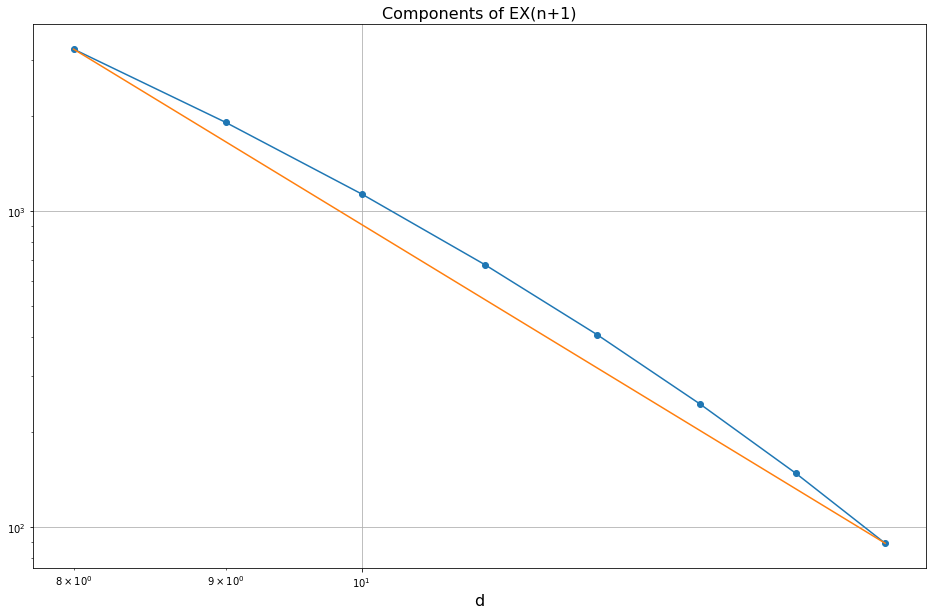

In [93]:
plt.figure(figsize=(16, 10))


plt.plot(d_range, arg_maxes, '-o')
plt.plot([d_range[0], d_range[-1]], [arg_maxes[0], arg_maxes[-1]])
plt.xscale('log')
plt.yscale('log')
plt.grid()
plt.xlabel('d', fontsize=16)
plt.title('Components of EX(n+1)', fontsize=16)
plt.show()

In [104]:
arg_maxes - n * np.e ** (-d_range / 2)

array([1426.43611113,  800.10034618,  460.20530009,  269.32285615,
        159.12478233,   94.6560807 ,   56.81180344,   33.69156299])

In [113]:
n * np.e ** (-d_range / 2) / 2

array([915.78194444, 555.44982691, 336.89734995, 204.33857192,
       123.93760883,  75.17195965,  45.59409828,  27.65421851])

In [106]:
np.log(2)

0.6931471805599453

In [112]:
3 * 7 * np.e ** (-7 / 2)

0.6341450518686886

In [117]:
(5 ** (0.5) - 1) / 2

0.6180339887498949

In [118]:
3 / 4

0.75

In [124]:
n = 10
k = 1
print((1 - 2 / (n - k)) * (1 - 2 / (n + k)), (1 - 2 / n) ** 2)

0.6363636363636364 0.6400000000000001


In [295]:
d = 5
print(4/3 * (1 - 3/2*np.e**(-d/2)) * (1 - 1/2 * np.e**(-d/2)))

1.1211779506686885


In [297]:
(1 - 3/2*np.e**(-d/2)) * (1 - 1/2 * np.e**(-d/2))

0.8408834630015165

In [300]:
(1 - 3/2 * np.e**(-d/2)) ** 2

0.7689053848762459

In [81]:
n = 2000
d = 4
m = int(3 * n * np.e ** (-d/2) / d)
k = int(n * np.e ** (-d / 2) / d)

203 67


1.061927887261017080861251809E+169


In [112]:
res = []
for n in tqdm([1000, 2000]):
    d = 5
    m = int(2 * n * np.e ** (-d / 2) / d)
    k = int(n * np.e ** (-d / 2) / d)
    print(m, k)
    
    a = Decimal(comb(n, m, exact=True)) * \
    Decimal(comb(n, m - k, exact=True)) * Decimal(1 - d/n) ** (m * (n + k - m))
    print(a)

    b = np.sum([
        [
            Decimal(comb(n, m, exact=True)) * \
            Decimal(comb(n, m - k, exact=True)) * \
            Decimal(comb(m, p, exact=True)) * \
            Decimal(comb(m - k, q, exact=True)) * \
            Decimal(comb(n - m, m - p, exact=True)) * \
            Decimal(comb(n + k - m, m - k - q, exact=True)) * \
            Decimal(1 - d/n) ** (2 * m * (n + k - m) - p * (n - 2 * m + 2 * k + q))
            for q in range(m - k)
        ]
        for p in range(m)
    ])
    print(b)
    x = Decimal(b) / Decimal(a) ** 2 / Decimal(np.e) ** (Decimal(n) * Decimal(np.e) ** Decimal(-d))
    print(x)
    res.append(x)
print(res[1] / res[0])

/var/folders/nm/ww3g6qt17nn323rj_h993tf00000gn/T/ipykernel_94141/2103244522.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for n in tqdm([1000, 2000]):


  0%|          | 0/2 [00:00<?, ?it/s]

32 16
276872808127500652894806892.1
7.750171711462320151374361974E+70
1198112261477543.459520695555
65 32
1.211794668713183750775597387E+56
5.174721286414211335387609587E+148
4.949057348075976991053384800E+30
4130712544392684.611979417407


In [89]:
b

Decimal('5.291527677518407482199784482E+217')

## EX^2

In [208]:
n = 30000000000
d = 20
m = int(n * np.e ** (-d / 2) / d / d / d)

In [225]:
values = np.array([
    Decimal(comb(m, q, exact=True)) * \
    Decimal(comb(n - m, m - q, exact=True)) / \
    Decimal(comb(n, m, exact=True)) * \
    Decimal(np.e) ** (d * q)
    for q in range(m + 1)
])

715203016319732159707825420.4 7.494978124638734366776051891E+77


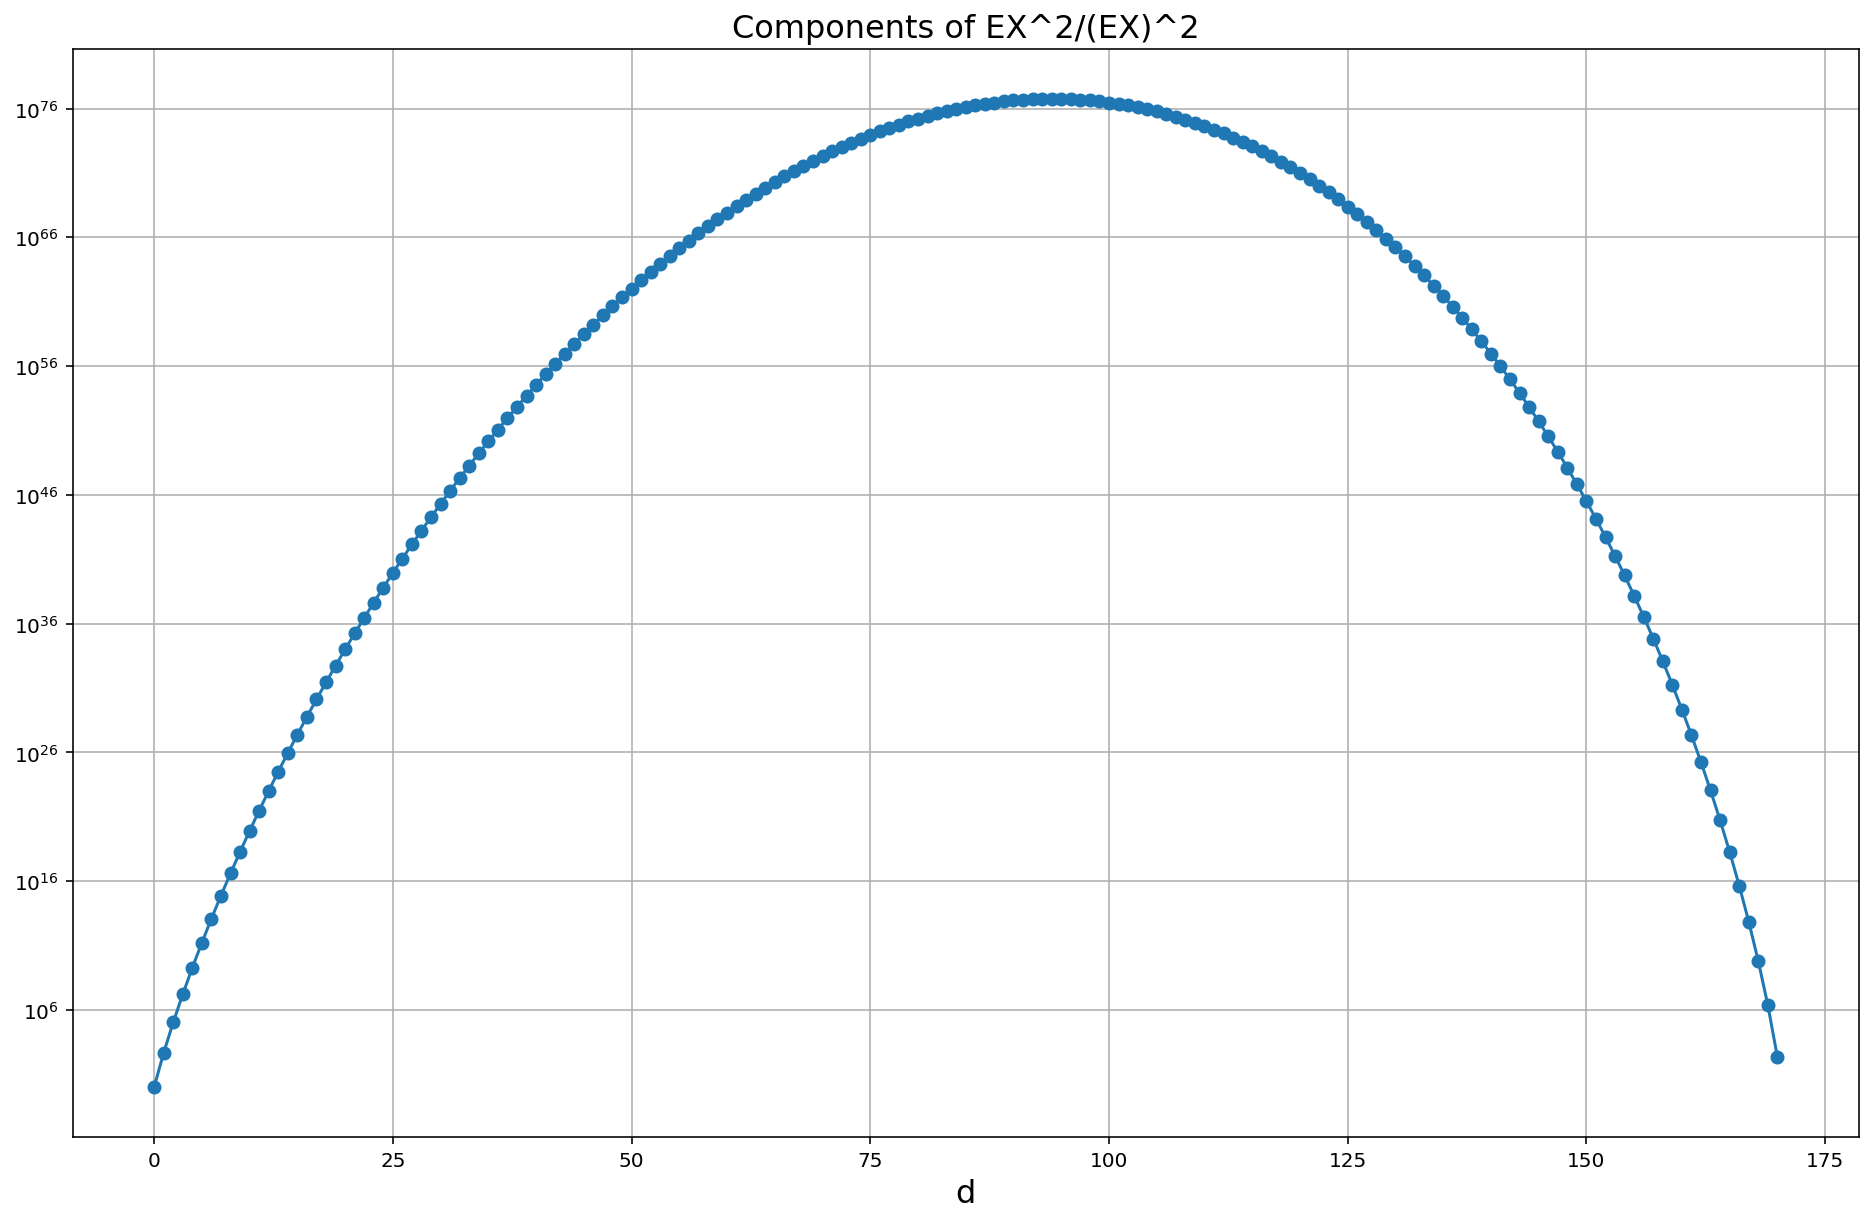

In [227]:
plt.figure(figsize=(16, 10))
plt.plot(range(m + 1), values, '-o')
print(Decimal(np.e) ** (Decimal(n) * Decimal(np.e) ** Decimal(-d)), sum(values))
plt.yscale('log')
plt.grid()
plt.xlabel('d', fontsize=16)
plt.title('Components of EX^2/(EX)^2', fontsize=16)
plt.show()

In [219]:
Decimal(np.e) ** Decimal(Decimal(d)* Decimal(n) * Decimal(np.e) ** Decimal(-d / 2) / 2 / d / d / d)

Decimal('2.427792408527498218322416592E+739')

In [228]:
values[-1]

Decimal('224.5987689392955264845752633')

In [221]:
Decimal(np.e) ** (d * m)

Decimal('3.992440670618654143865263702E+1476')

In [223]:
Decimal(comb(m, m, exact=True)) * \
Decimal(comb(n - m, m - m, exact=True)) / \
Decimal(comb(n, m, exact=True))

Decimal('5.625600665582151652854478772E-1475')

In [224]:
Decimal(comb(m, m, exact=True)) * \
Decimal(comb(n - m, m - m, exact=True)) / \
Decimal(comb(n, m, exact=True)) * \
Decimal(np.e) ** (d * m)

Decimal('224.5987689392955264845752633')

## independence number

In [363]:
n = 20000
d = 6
values = np.array([2 * n - 2 * np.mean(np.array(list(map(int, 
                               open(f'max-matching/cmake-build-debug/n={n},d={d}.txt').read().split('\n')[:-1]))))
                   for d in [6, 7]])

In [86]:
print(np.std(values), n**0.5)

41.07581862848262 100.0


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


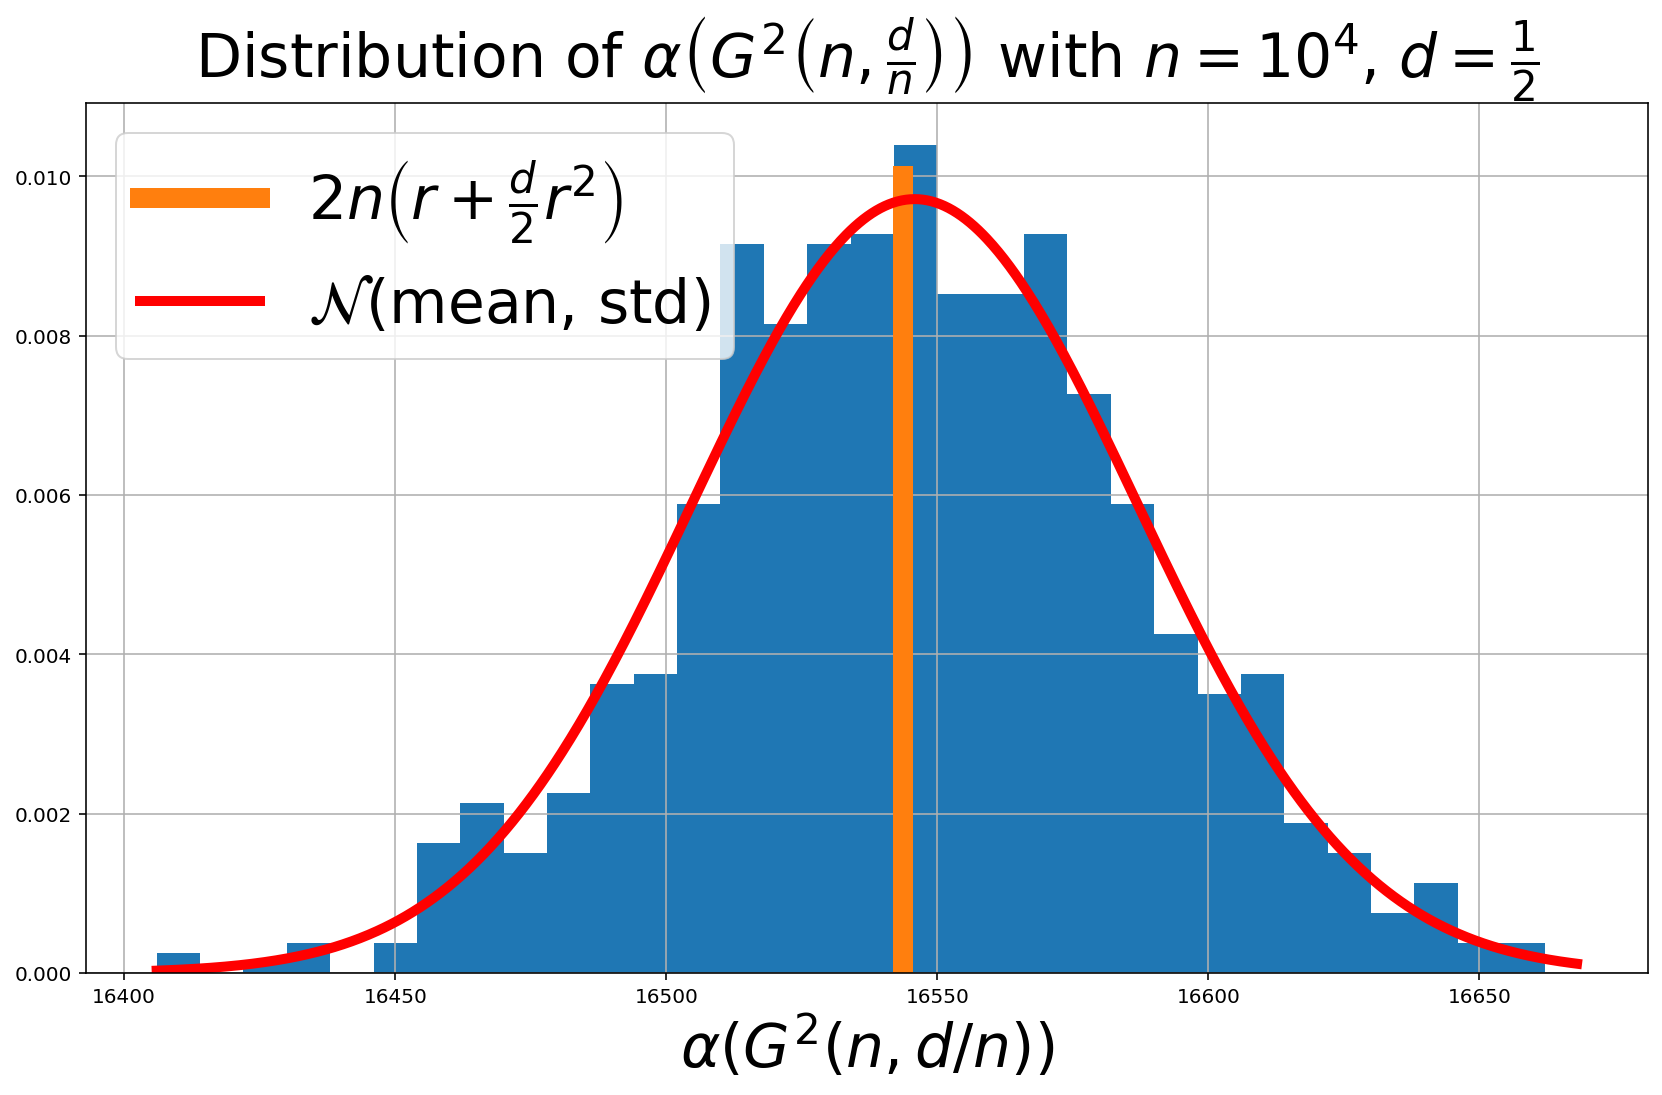

In [84]:
n = 10000
d = 1/2
values = 2 * n - np.array(list(map(int, 
                               open(f'max-matching/cmake-build-debug/n={n},d={"05"}.txt').read().split('\n')[:-1])))
kde = sps.gaussian_kde(values)
norm_approx = sps.norm(np.mean(values), np.std(values))
r = 0.70346742249839165205
center_bound = (r + d * r**2 / 2) * 2 * n
#print(np.mean(values), np.std(values), np.max(values), np.min(values))
#print(n * np.e ** (-d), n * np.e ** (-d / 2))
lower_bound = n * np.e ** (-d)
space = np.linspace(np.min(values), np.max(values), 1000)
plt.figure(figsize=(14, 8))
plt.hist(values, density=True, bins=np.arange(np.min(values), np.max(values) + 1, 8))
#plt.plot([lower_bound, lower_bound], [0, 0.1], linewidth=3, label=r"$ne^{-d}$")
#plt.plot([2 * lower_bound, 2 * lower_bound], [0, 0.1], linewidth=3, label=r"$2ne^{-d}$")
plt.plot([center_bound, center_bound], [0, 0.01], linewidth=10, label=r"$2n \left(r + \frac{d}{2}r^2 \right)$")
#plt.plot(space, kde(space))
plt.plot(space, norm_approx.pdf(space), label=r'$\mathcal{N}$(mean, std)', linewidth=5, color='red')
plt.grid()
plt.legend(prop={'size': 30})
plt.title(r"Distribution of $\alpha \left(G^2 \left(n, \frac{d}{n} \right) \right)$ with $n=10^4$, $d=\frac{1}{2}$",
          fontsize=30)
plt.xlabel(r"$\alpha(G^2(n, d/n))$", fontsize=30)
plt.savefig('alphad=05.eps')
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


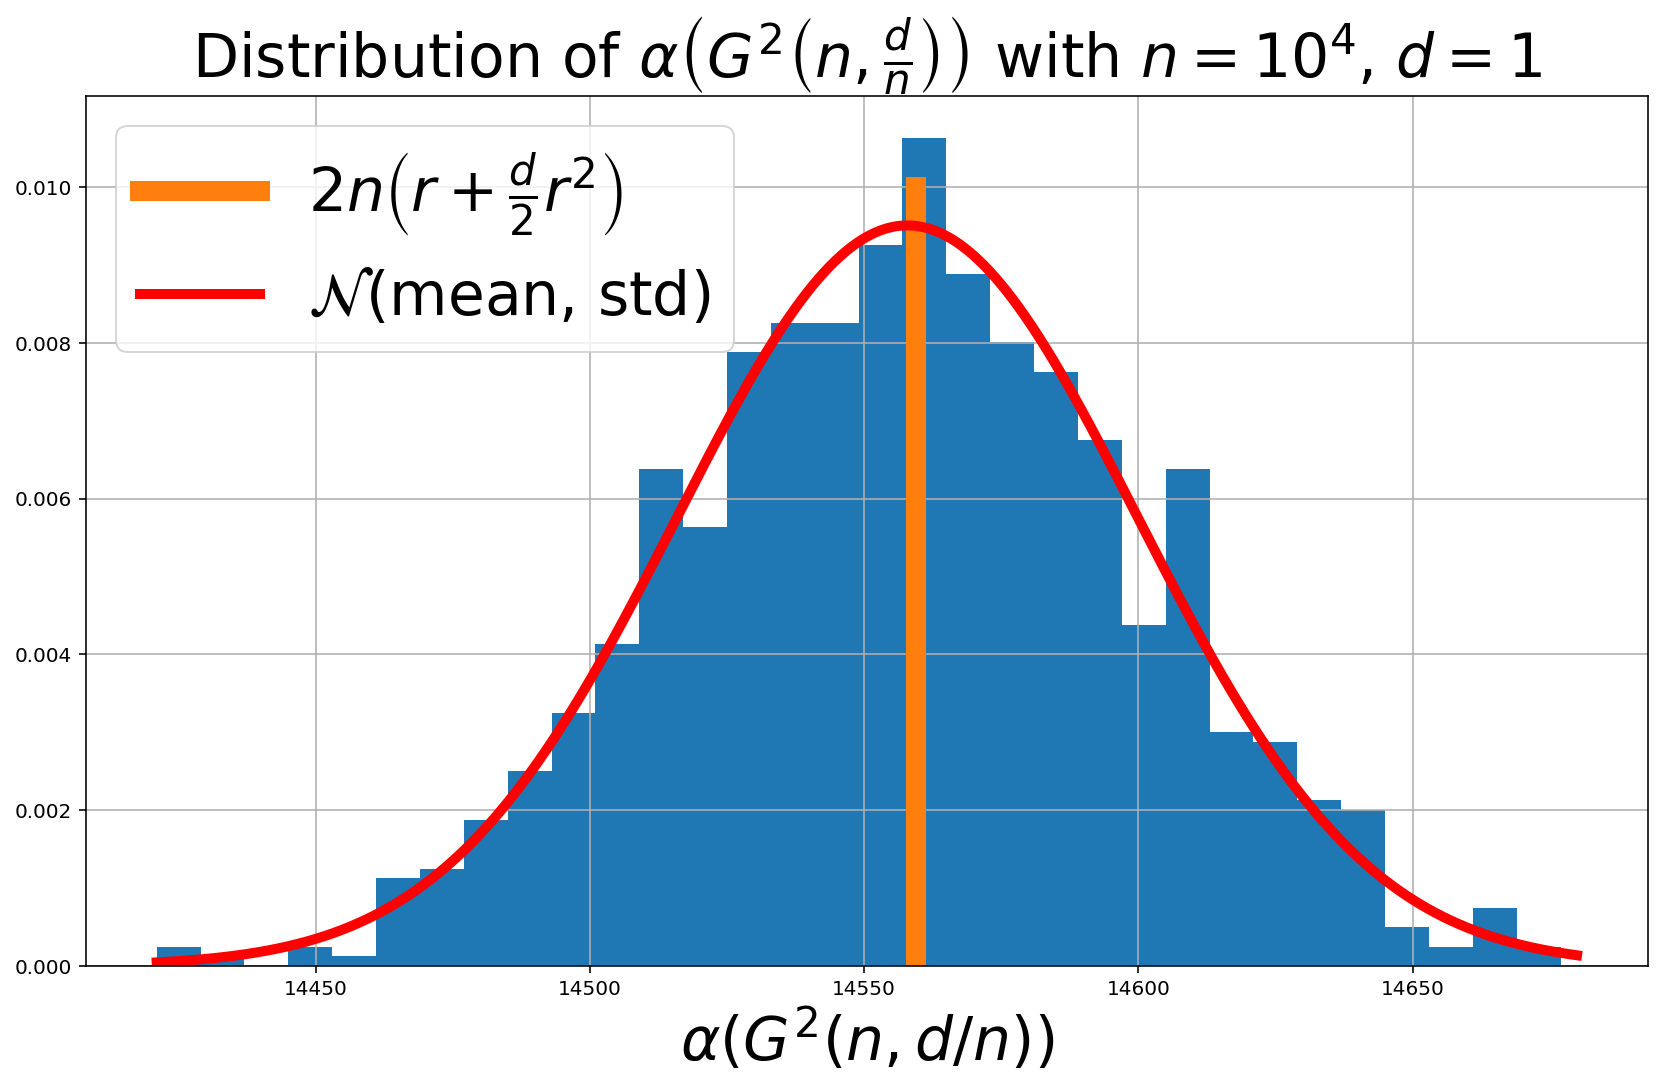

In [82]:
n = 10000
d = 1
values = 2 * n - np.array(list(map(int, 
                               open(f'max-matching/cmake-build-debug/n={n},d={d}.txt').read().split('\n')[:-1])))
kde = sps.gaussian_kde(values)
norm_approx = sps.norm(np.mean(values), np.std(values))
r = 0.56714329040978387300
center_bound = (r + d * r**2 / 2) * 2 * n
#print(np.mean(values), np.std(values), np.max(values), np.min(values))
#print(n * np.e ** (-d), n * np.e ** (-d / 2))
lower_bound = n * np.e ** (-d)
space = np.linspace(np.min(values), np.max(values), 1000)
plt.figure(figsize=(14, 8))
plt.hist(values, density=True, bins=np.arange(np.min(values), np.max(values) + 1, 8))
#plt.plot([lower_bound, lower_bound], [0, 0.1], linewidth=3, label=r"$ne^{-d}$")
#plt.plot([2 * lower_bound, 2 * lower_bound], [0, 0.1], linewidth=3, label=r"$2ne^{-d}$")
plt.plot([center_bound, center_bound], [0, 0.01], linewidth=10, label=r"$2n \left(r + \frac{d}{2}r^2 \right)$")
#plt.plot(space, kde(space))
plt.plot(space, norm_approx.pdf(space), label=r'$\mathcal{N}$(mean, std)', linewidth=5, color='red')
plt.grid()
plt.legend(prop={'size': 30})
plt.title(r"Distribution of $\alpha \left(G^2 \left(n, \frac{d}{n} \right) \right)$ with $n=10^4$, $d=1$",
          fontsize=30)
plt.xlabel(r"$\alpha(G^2(n, d/n))$", fontsize=30)
plt.savefig('alphad=1.eps')
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


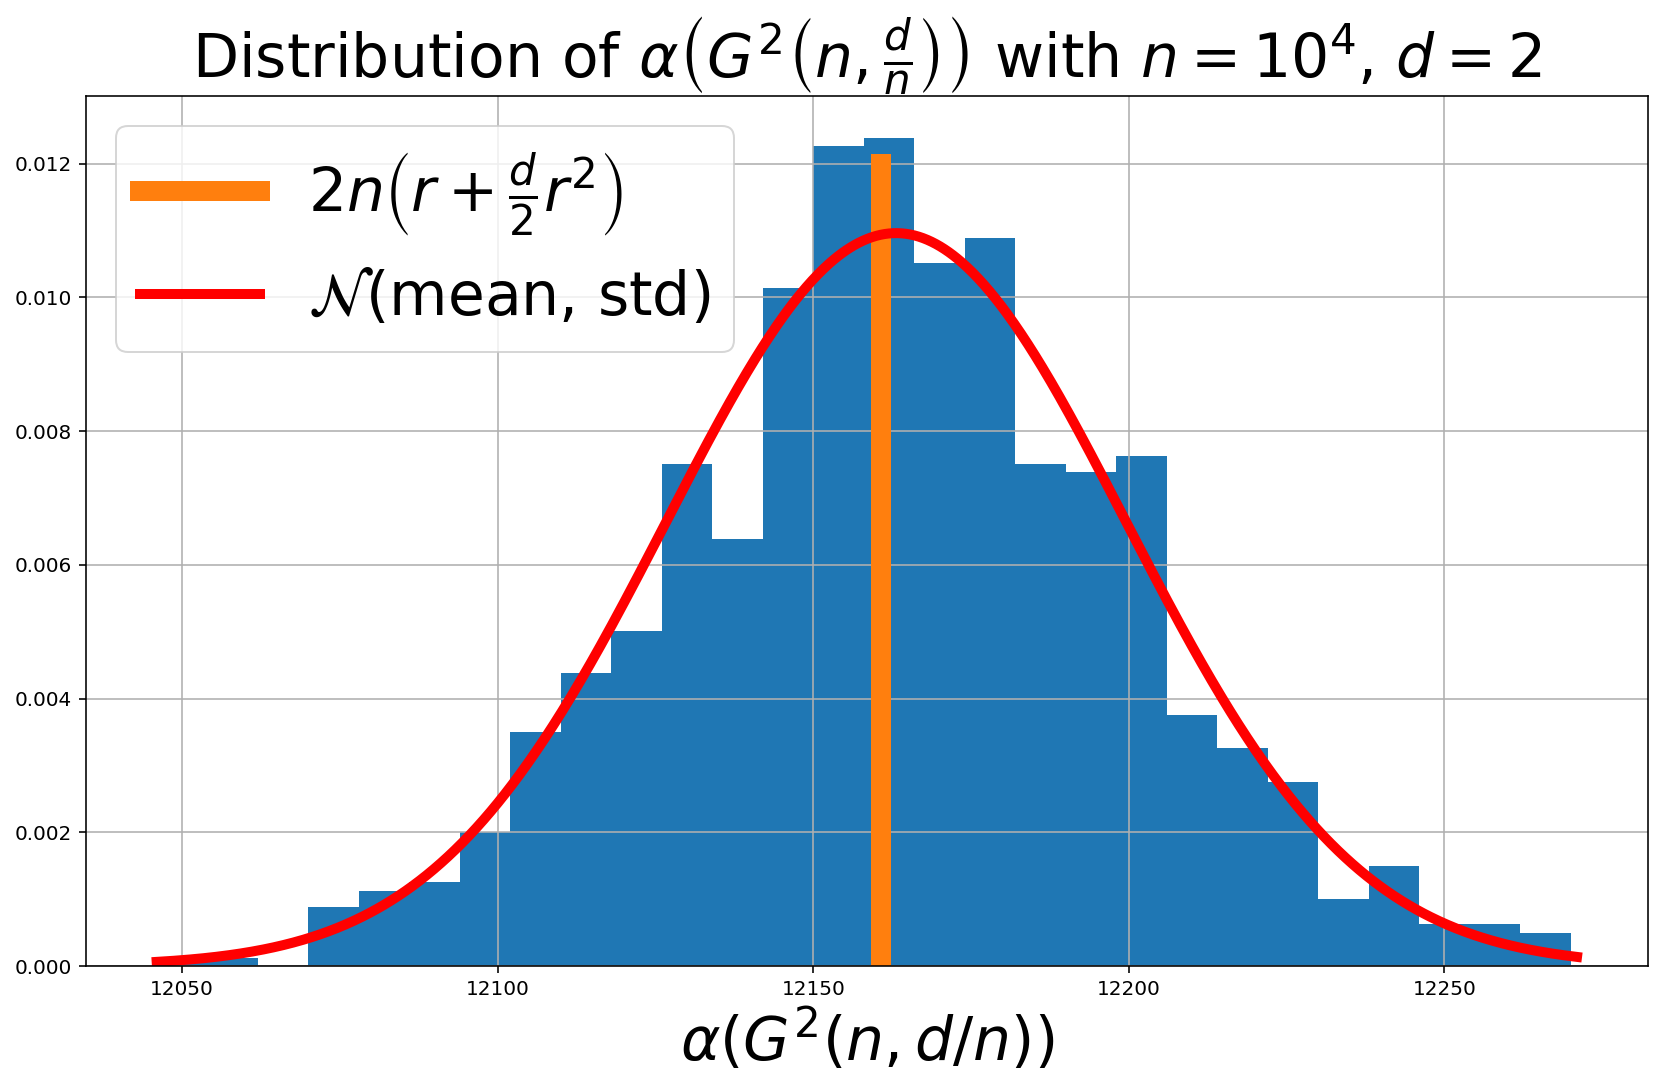

In [80]:
n = 10000
d = 2
values = 2 * n - np.array(list(map(int, 
                               open(f'max-matching/cmake-build-debug/n={n},d={d}.txt').read().split('\n')[:-1])))
kde = sps.gaussian_kde(values)
norm_approx = sps.norm(np.mean(values), np.std(values))
r = 0.42630275100686274567
center_bound = (r + d * r**2 / 2) * 2 * n
#print(np.mean(values), np.std(values), np.max(values), np.min(values))
#print(n * np.e ** (-d), n * np.e ** (-d / 2))
lower_bound = n * np.e ** (-d)
space = np.linspace(np.min(values), np.max(values), 1000)
plt.figure(figsize=(14, 8))
plt.hist(values, density=True, bins=np.arange(np.min(values), np.max(values) + 1, 8))
#plt.plot([lower_bound, lower_bound], [0, 0.1], linewidth=3, label=r"$ne^{-d}$")
#plt.plot([2 * lower_bound, 2 * lower_bound], [0, 0.1], linewidth=3, label=r"$2ne^{-d}$")
plt.plot([center_bound, center_bound], [0, 0.012], linewidth=10, label=r"$2n \left(r + \frac{d}{2}r^2 \right)$")
#plt.plot(space, kde(space))
plt.plot(space, norm_approx.pdf(space), label=r'$\mathcal{N}$(mean, std)', linewidth=5, color='red')
plt.grid()
plt.legend(prop={'size': 30})
plt.title(r"Distribution of $\alpha \left(G^2 \left(n, \frac{d}{n} \right) \right)$ with $n=10^4$, $d=2$",
          fontsize=30)
plt.xlabel(r"$\alpha(G^2(n, d/n))$", fontsize=30)
plt.savefig('alphad=2.eps')
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


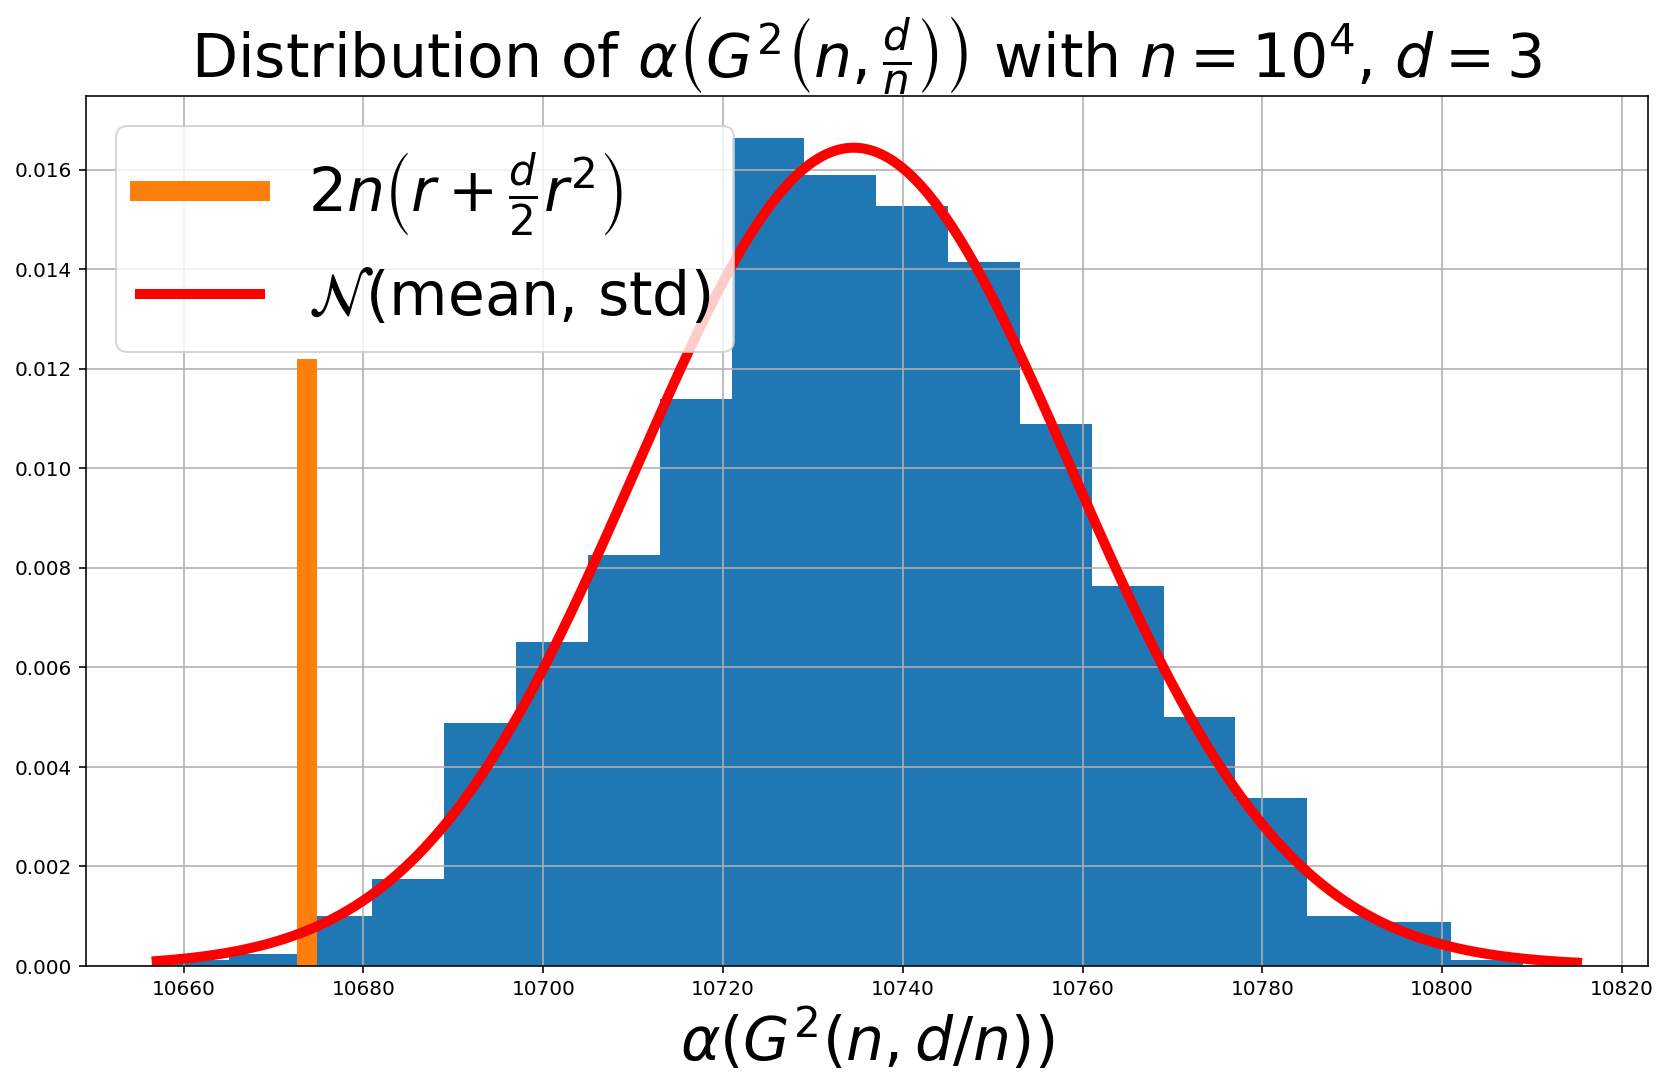

In [79]:
n = 10000
d = 3
values = 2 * n - np.array(list(map(int, 
                               open(f'max-matching/cmake-build-debug/n={n},d={d}.txt').read().split('\n')[:-1])))
kde = sps.gaussian_kde(values)
norm_approx = sps.norm(np.mean(values), np.std(values))
r = 0.34996963165467998666
center_bound = (r + d * r**2 / 2) * 2 * n
#print(np.mean(values), np.std(values), np.max(values), np.min(values))
#print(n * np.e ** (-d), n * np.e ** (-d / 2))
lower_bound = n * np.e ** (-d)
space = np.linspace(np.min(values), np.max(values), 1000)
plt.figure(figsize=(14, 8))
plt.hist(values, density=True, bins=np.arange(np.min(values), np.max(values) + 1, 8))
#plt.plot([lower_bound, lower_bound], [0, 0.1], linewidth=3, label=r"$ne^{-d}$")
#plt.plot([2 * lower_bound, 2 * lower_bound], [0, 0.1], linewidth=3, label=r"$2ne^{-d}$")
plt.plot([center_bound, center_bound], [0, 0.012], linewidth=10, label=r"$2n \left(r + \frac{d}{2}r^2 \right)$")
#plt.plot(space, kde(space))
plt.plot(space, norm_approx.pdf(space), label=r'$\mathcal{N}$(mean, std)', linewidth=5, color='red')
plt.grid()
plt.legend(prop={'size': 30}, loc='upper left')
plt.title(r"Distribution of $\alpha \left(G^2 \left(n, \frac{d}{n} \right) \right)$ with $n=10^4$, $d=3$",
          fontsize=30)
plt.xlabel(r"$\alpha(G^2(n, d/n))$", fontsize=30)
plt.savefig('alphad=3.eps')
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


1.158405437635039


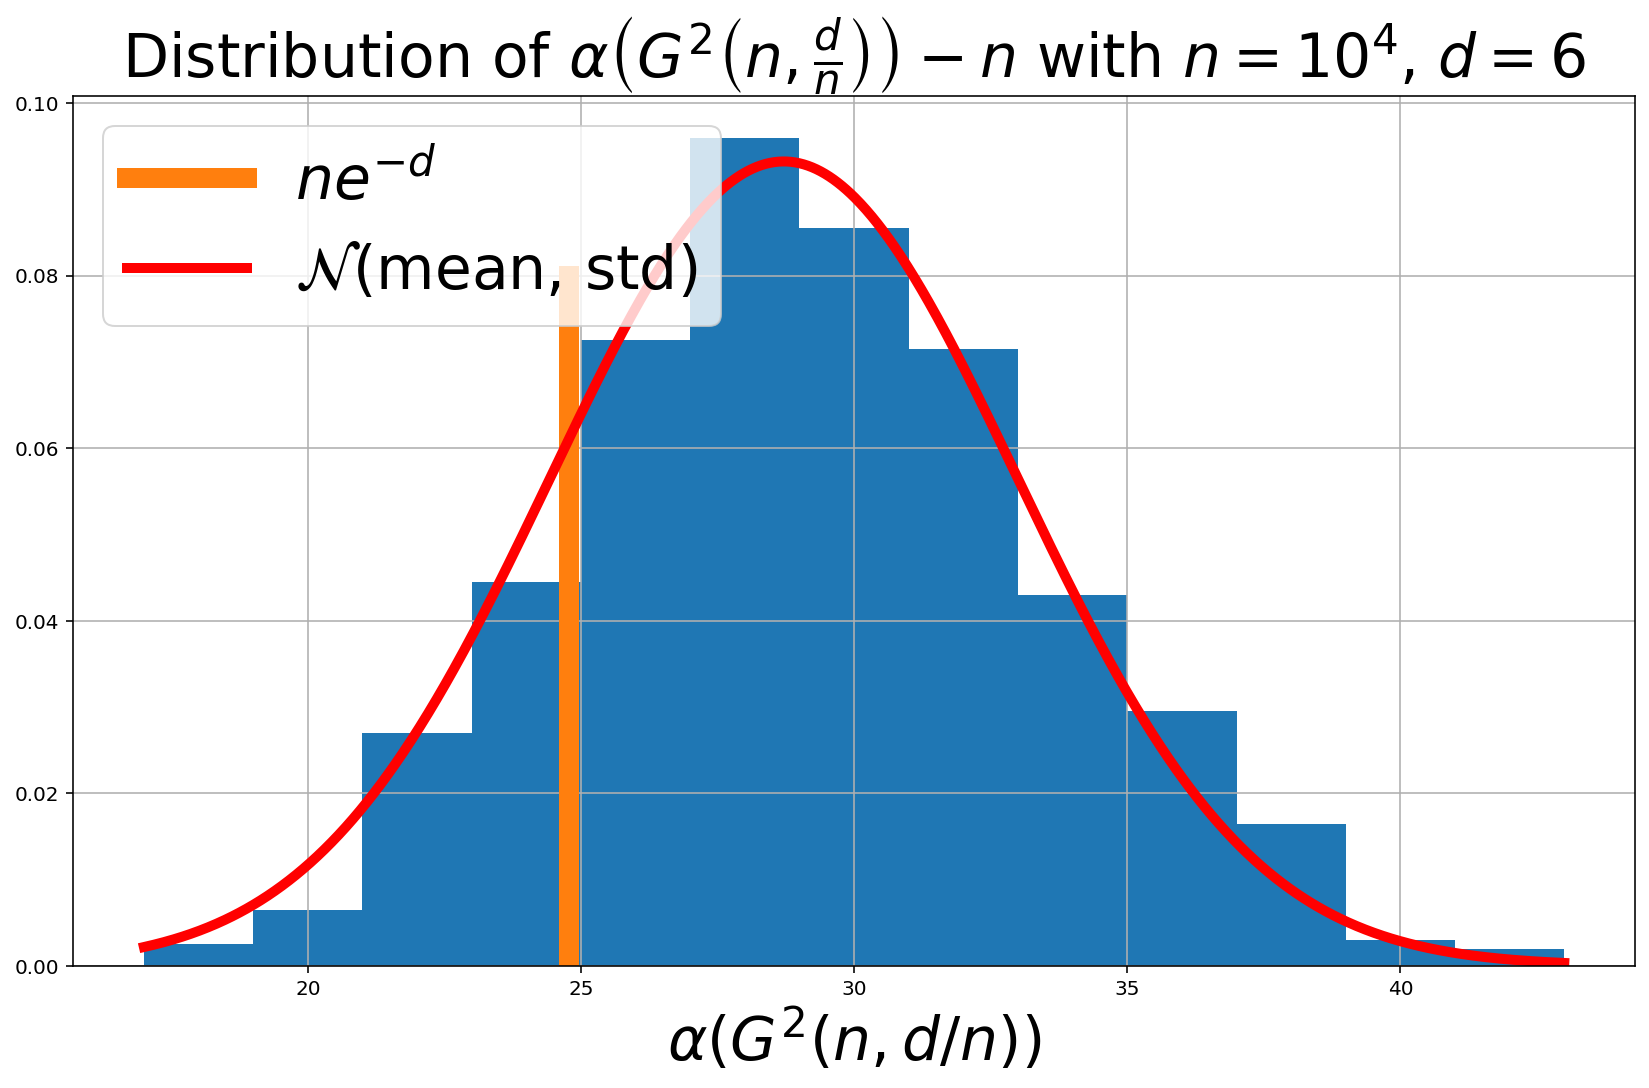

In [128]:
n = 10000
d = 6
values = n - np.array(list(map(int, 
                               open(f'max-matching/cmake-build-debug/n={n},d={d}.txt').read().split('\n')[:-1])))
kde = sps.gaussian_kde(values)
norm_approx = sps.norm(np.mean(values), np.std(values))
r = 0.34996963165467998666
center_bound = (r + d * r**2 / 2) * 2 * n
print(np.mean(values) / n / np.e ** (-d))
#print(n * np.e ** (-d), n * np.e ** (-d / 2))
lower_bound = n * np.e ** (-d)
space = np.linspace(np.min(values), np.max(values), 1000)
plt.figure(figsize=(14, 8))
plt.hist(values, density=True, bins=np.arange(np.min(values), np.max(values) + 1, 2))
plt.plot([lower_bound, lower_bound], [0, 0.08], linewidth=10, label=r"$ne^{-d}$")
#plt.plot([2 * lower_bound, 2 * lower_bound], [0, 0.1], linewidth=3, label=r"$2ne^{-d}$")
#plt.plot([center_bound, center_bound], [0, 0.012], linewidth=10, label=r"$2n \left(r + \frac{d}{2}r^2 \right)$")
#plt.plot(space, kde(space))
plt.plot(space, norm_approx.pdf(space), label=r'$\mathcal{N}$(mean, std)', linewidth=5, color='red')
plt.grid()
plt.legend(prop={'size': 30}, loc='upper left')
plt.title(r"Distribution of $\alpha \left(G^2 \left(n, \frac{d}{n} \right) \right) - n$ with $n=10^4$, $d=6$",
          fontsize=30)
plt.xlabel(r"$\alpha(G^2(n, d/n))$", fontsize=30)
plt.savefig('alphad=6.eps')
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


1.1712618103216241


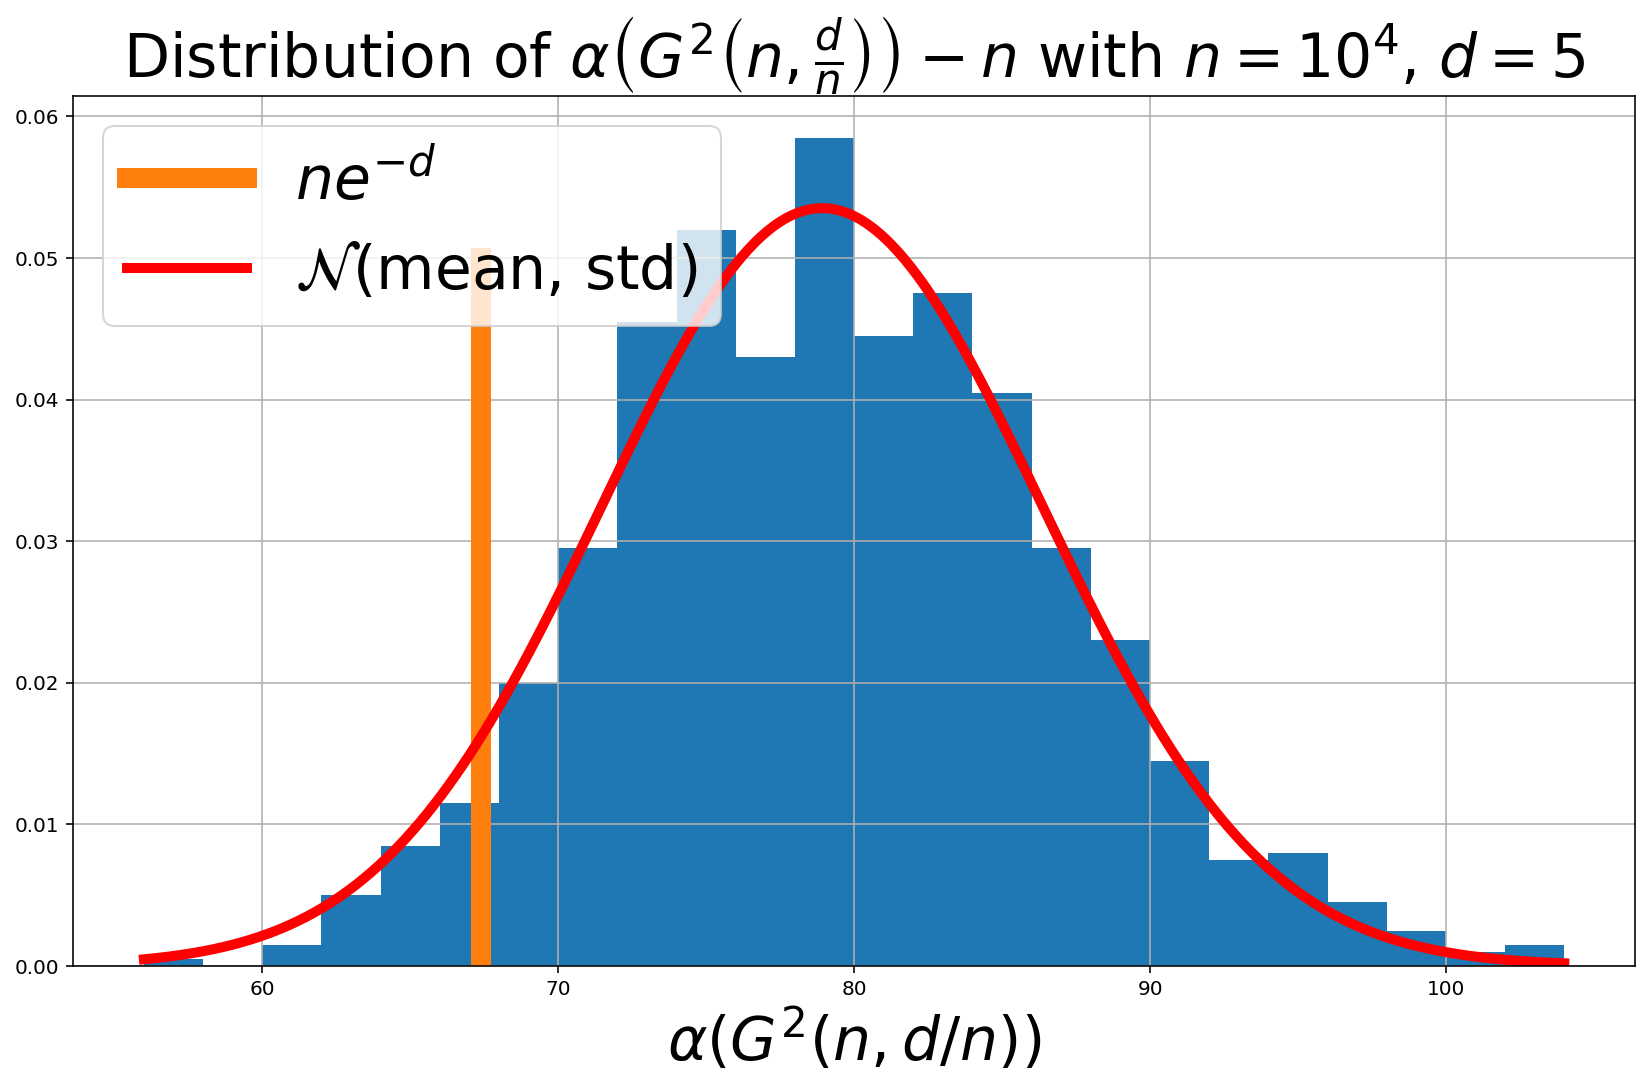

In [125]:
n = 10000
d = 5
values = n - np.array(list(map(int, 
                               open(f'max-matching/cmake-build-debug/n={n},d={d}.txt').read().split('\n')[:-1])))
kde = sps.gaussian_kde(values)
norm_approx = sps.norm(np.mean(values), np.std(values))
r = 0.34996963165467998666
center_bound = (r + d * r**2 / 2) * 2 * n
print(np.mean(values) / n / np.e ** (-d))
#print(n * np.e ** (-d), n * np.e ** (-d / 2))
lower_bound = n * np.e ** (-d)
space = np.linspace(np.min(values), np.max(values), 1000)
plt.figure(figsize=(14, 8))
plt.hist(values, density=True, bins=np.arange(np.min(values), np.max(values) + 1, 2))
plt.plot([lower_bound, lower_bound], [0, 0.05], linewidth=10, label=r"$ne^{-d}$")
#plt.plot([2 * lower_bound, 2 * lower_bound], [0, 0.1], linewidth=3, label=r"$2ne^{-d}$")
#plt.plot([center_bound, center_bound], [0, 0.012], linewidth=10, label=r"$2n \left(r + \frac{d}{2}r^2 \right)$")
#plt.plot(space, kde(space))
plt.plot(space, norm_approx.pdf(space), label=r'$\mathcal{N}$(mean, std)', linewidth=5, color='red')
plt.grid()
plt.legend(prop={'size': 30}, loc='upper left')
plt.title(r"Distribution of $\alpha \left(G^2 \left(n, \frac{d}{n} \right) \right) - n$ with $n=10^4$, $d=5$",
          fontsize=30)
plt.xlabel(r"$\alpha(G^2(n, d/n))$", fontsize=30)
plt.savefig('alphad=5.eps')
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


1.2475841077023553


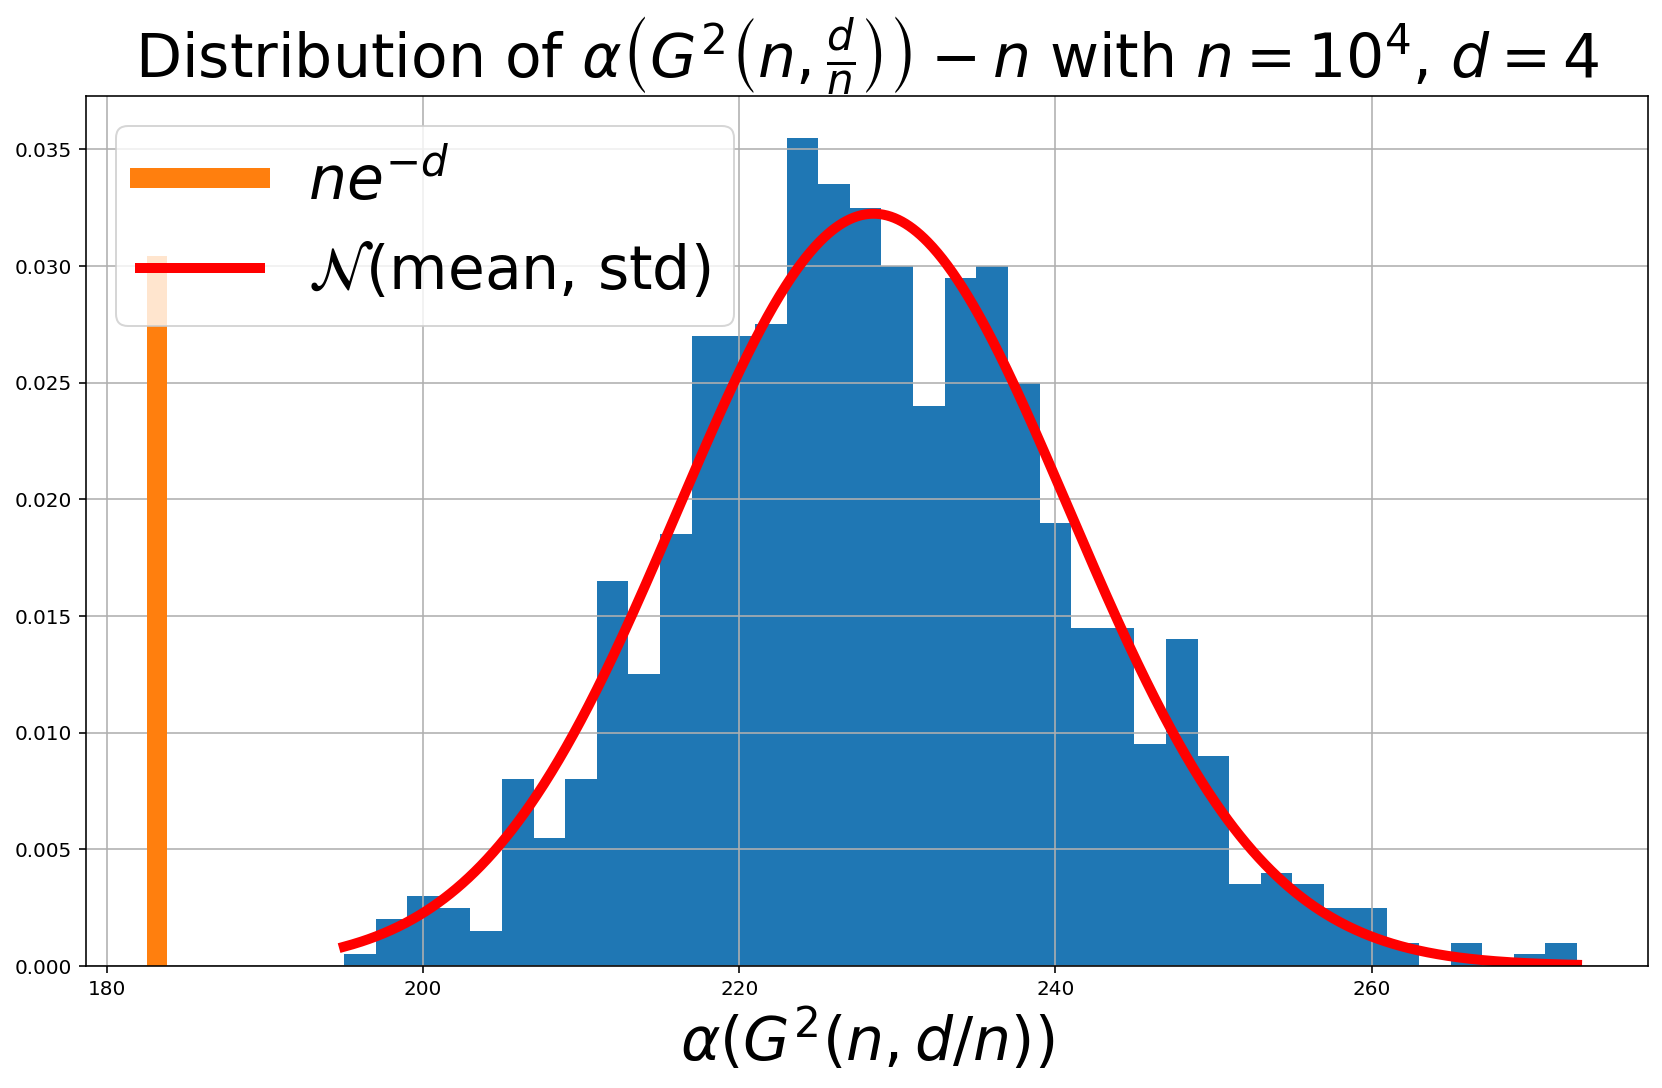

In [126]:
n = 10000
d = 4
values = n - np.array(list(map(int, 
                               open(f'max-matching/cmake-build-debug/n={n},d={d}.txt').read().split('\n')[:-1])))
kde = sps.gaussian_kde(values)
norm_approx = sps.norm(np.mean(values), np.std(values))
r = 0.34996963165467998666
center_bound = (r + d * r**2 / 2) * 2 * n
print(np.mean(values) / n / np.e ** (-d))
#print(n * np.e ** (-d), n * np.e ** (-d / 2))
lower_bound = n * np.e ** (-d)
space = np.linspace(np.min(values), np.max(values), 1000)
plt.figure(figsize=(14, 8))
plt.hist(values, density=True, bins=np.arange(np.min(values), np.max(values) + 1, 2))
plt.plot([lower_bound, lower_bound], [0, 0.03], linewidth=10, label=r"$ne^{-d}$")
#plt.plot([2 * lower_bound, 2 * lower_bound], [0, 0.1], linewidth=3, label=r"$2ne^{-d}$")
#plt.plot([center_bound, center_bound], [0, 0.012], linewidth=10, label=r"$2n \left(r + \frac{d}{2}r^2 \right)$")
#plt.plot(space, kde(space))
plt.plot(space, norm_approx.pdf(space), label=r'$\mathcal{N}$(mean, std)', linewidth=5, color='red')
plt.grid()
plt.legend(prop={'size': 30}, loc='upper left')
plt.title(r"Distribution of $\alpha \left(G^2 \left(n, \frac{d}{n} \right) \right) - n$ with $n=10^4$, $d=4$",
          fontsize=30)
plt.xlabel(r"$\alpha(G^2(n, d/n))$", fontsize=30)
plt.savefig('alphad=4.eps')
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


1.4753570034947496


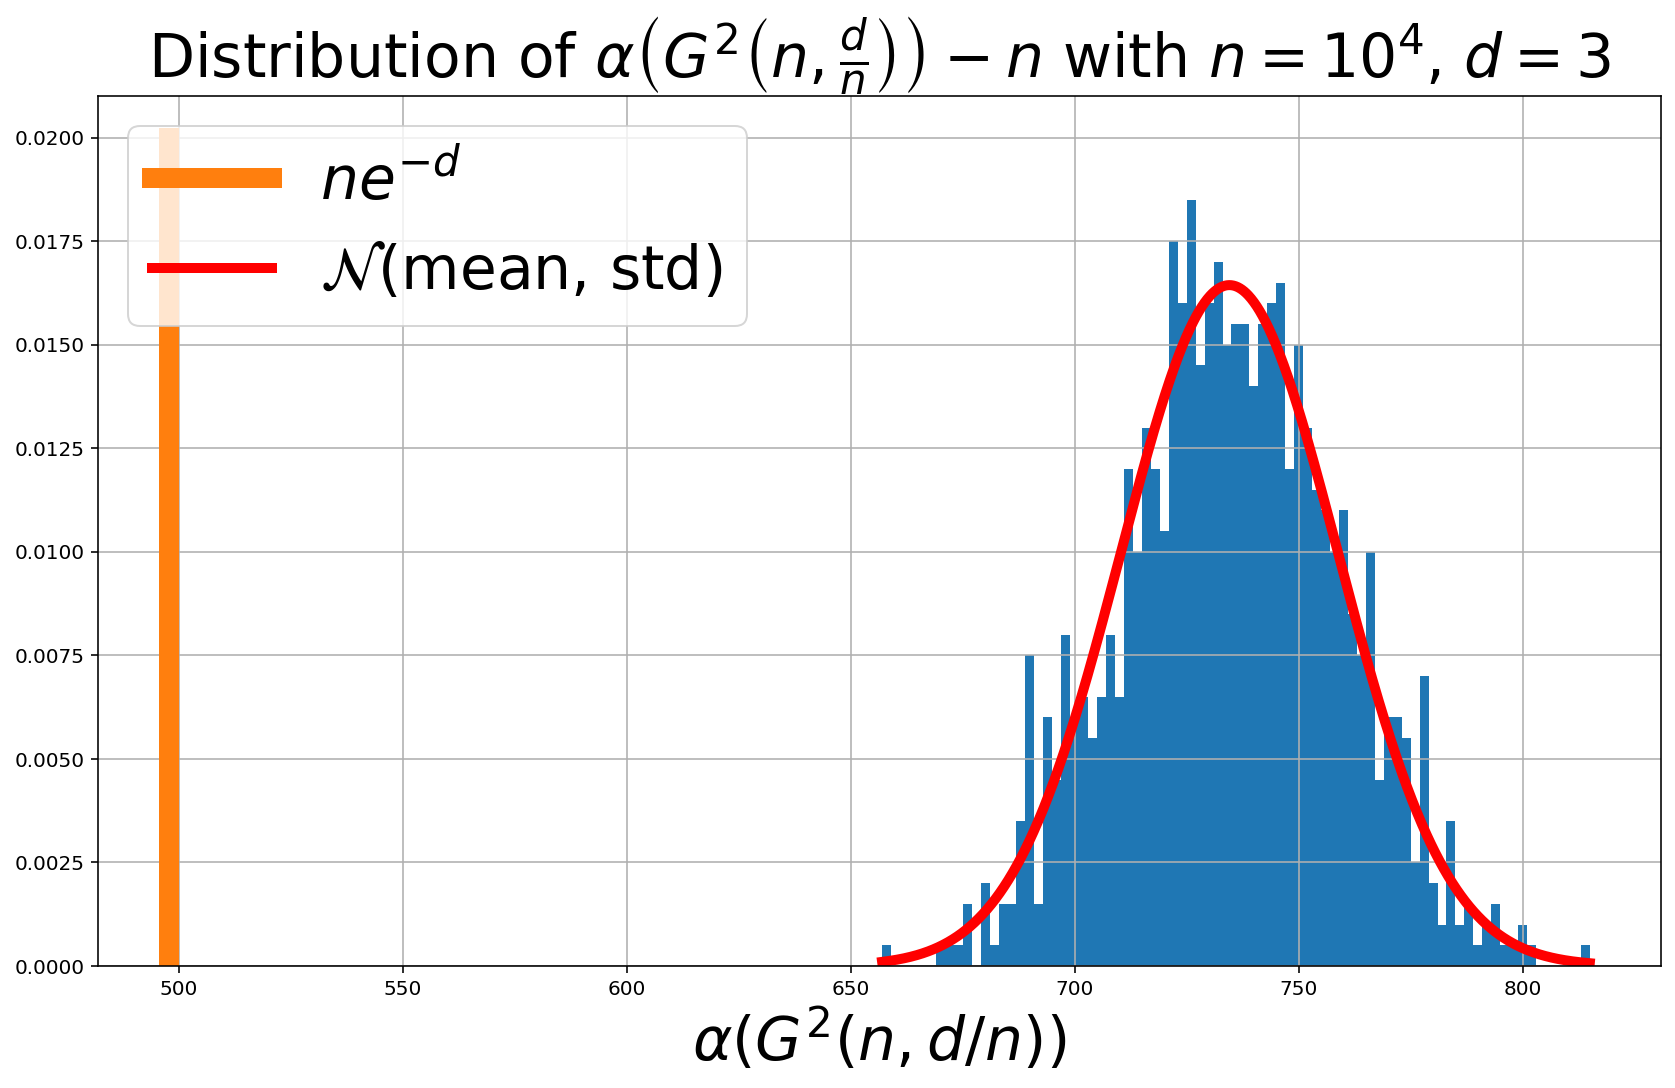

In [127]:
n = 10000
d = 3
values = n - np.array(list(map(int, 
                               open(f'max-matching/cmake-build-debug/n={n},d={d}.txt').read().split('\n')[:-1])))
kde = sps.gaussian_kde(values)
norm_approx = sps.norm(np.mean(values), np.std(values))
r = 0.34996963165467998666
center_bound = (r + d * r**2 / 2) * 2 * n
print(np.mean(values) / n / np.e ** (-d))
#print(n * np.e ** (-d), n * np.e ** (-d / 2))
lower_bound = n * np.e ** (-d)
space = np.linspace(np.min(values), np.max(values), 1000)
plt.figure(figsize=(14, 8))
plt.hist(values, density=True, bins=np.arange(np.min(values), np.max(values) + 1, 2))
plt.plot([lower_bound, lower_bound], [0, 0.02], linewidth=10, label=r"$ne^{-d}$")
#plt.plot([2 * lower_bound, 2 * lower_bound], [0, 0.1], linewidth=3, label=r"$2ne^{-d}$")
#plt.plot([center_bound, center_bound], [0, 0.012], linewidth=10, label=r"$2n \left(r + \frac{d}{2}r^2 \right)$")
#plt.plot(space, kde(space))
plt.plot(space, norm_approx.pdf(space), label=r'$\mathcal{N}$(mean, std)', linewidth=5, color='red')
plt.grid()
plt.legend(prop={'size': 30}, loc='upper left')
plt.title(r"Distribution of $\alpha \left(G^2 \left(n, \frac{d}{n} \right) \right) - n$ with $n=10^4$, $d=3$",
          fontsize=30)
plt.xlabel(r"$\alpha(G^2(n, d/n))$", fontsize=30)
plt.savefig('alphad=3_2.eps')
plt.show()

## mean behavior

In [129]:
n = 10000
values = np.array([2 * n - np.array(list(map(int, 
    open(f'max-matching/cmake-build-debug/n={n},d={d}.txt').read().split('\n')[:-1]))) 
                  for d in ['05', '1', '2', '3', '4', '5', '6']] )

In [195]:
d_range = [0.5, 1, 2, 3, 4, 5, 6]
space = np.linspace(0.1, 10, 1000)
imperical = values.mean(axis=1) / (2 * n)
lower = 1 / 2 + np.e ** (-space) / 2
upper = 1 / 2 + np.e ** (-space / 2) / 2

lamber = []
for x in space:
    r = lambertw(x).real / x
    lamber.append(r + x * r**2 / 2)
lamber = np.array(lamber)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


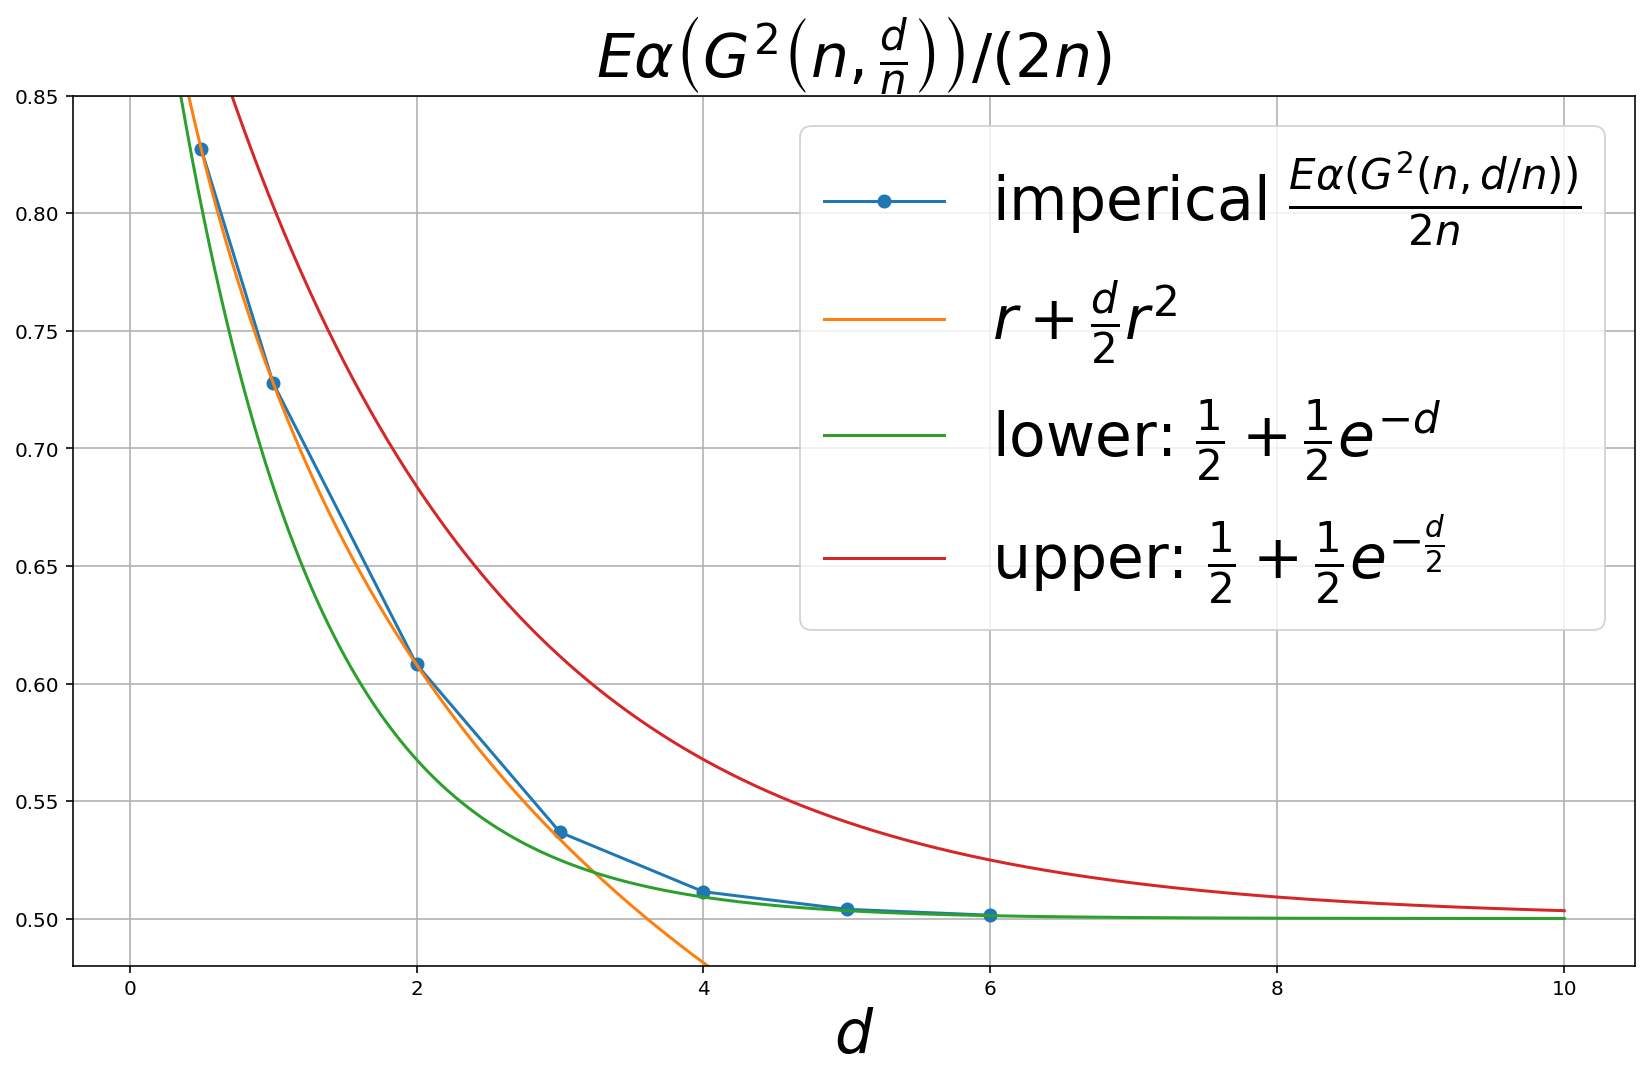

In [204]:
plt.figure(figsize=(14, 8))
plt.plot(d_range, imperical, '-o', label=r'imperical $\frac{E\alpha(G^2(n, d/n))}{2n}$')
plt.plot(space, lamber, label=r'$r + \frac{d}{2}r^2$')
plt.plot(space, lower, label=r'lower: $\frac{1}{2} + \frac{1}{2}e^{-d}$')
plt.plot(space, upper, label=r'upper: $\frac{1}{2} + \frac{1}{2}e^{-\frac{d}{2}}$')
plt.grid()
plt.legend(prop={'size': 30}, loc='upper right')
plt.title(r"$E\alpha \left(G^2 \left(n, \frac{d}{n} \right) \right) / (2n)$",
          fontsize=30)
plt.xlabel(r"$d$", fontsize=30)
plt.ylim((0.48, 0.85))
plt.savefig('all.eps')
plt.show()